# Fruit Image Classification using FruitNet
This notebook is written and executed by **Dr Raheel Siddiqi** on *08-09-2019*. The notebook presents an experiment to classify fruit images using *FruitNet*. FruitNet is a Convolutional Neural Network (CNN) based model with the following architecture:
![FruitNet](FruitNet_architecture.jpg)
FruitNet is based on a very simple 12-layer architecture, where only 6 layers have trainable weights and biases. In order to avoid overfitting the following four steps are ensured:
1. Use of large train set.
2. Using a low capacity network i.e. less number of layers, less learnable parameters. This is done to reduce memorization capacity.
3. Adding weight regularization to dense layer.
4. Drop out layers have also been added.

[Fruits 360](https://www.kaggle.com/moltean/fruits) dataset (containing 52262 training images and 17540 test images belonging to 101 fruit classes) has been exploited for the task.  

## Setting up the model

In [1]:
import os
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

fruitNetModel=models.Sequential()

fruitNetModel.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(100, 100, 3)))
fruitNetModel.add(layers.Conv2D(8, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(16, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(16, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Flatten())
fruitNetModel.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
fruitNetModel.add(layers.Dropout(0.2))
fruitNetModel.add(layers.Dense(101, activation='softmax'))

fruitNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
fruitNetModel.summary()

filepath="FruitNet_fruit_image_classification_best_model_101_classes.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 8)         224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)    

## Setting up Training and Validation Data

In [2]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Training'
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'

In [3]:
batch_size=32
number_of_training_samples=52262
number_of_test_samples=17540

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 52262 images belonging to 101 classes.
Found 17540 images belonging to 101 classes.


## Model Training

In [5]:
import math

history = fruitNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=100,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1446/1633 [=========================>....] - ETA: 1:38 - loss: 3.5080 - categorical_accuracy: 0.1586

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100279). Check your callbacks.
  % delta_t_median)


1493/1633 [==========================>...] - ETA: 1:13 - loss: 3.4803 - categorical_accuracy: 0.1628

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104652). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 907s 556ms/step - loss: 3.3981 - categorical_accuracy: 0.1756 - val_loss: 1.8426 - val_categorical_accuracy: 0.6137
Epoch 2/100
  51/1633 [..............................] - ETA: 5:02 - loss: 2.4632 - categorical_accuracy: 0.3382

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102085). Check your callbacks.
  % delta_t_median)


  52/1633 [..............................] - ETA: 5:10 - loss: 2.4684 - categorical_accuracy: 0.3353

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124960). Check your callbacks.
  % delta_t_median)


  55/1633 [>.............................] - ETA: 5:31 - loss: 2.4619 - categorical_accuracy: 0.3341

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164014). Check your callbacks.
  % delta_t_median)


  57/1633 [>.............................] - ETA: 5:39 - loss: 2.4587 - categorical_accuracy: 0.3361

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187455). Check your callbacks.
  % delta_t_median)


  58/1633 [>.............................] - ETA: 5:45 - loss: 2.4546 - categorical_accuracy: 0.3378

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.203077). Check your callbacks.
  % delta_t_median)


  60/1633 [>.............................] - ETA: 5:55 - loss: 2.4492 - categorical_accuracy: 0.3375

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164025). Check your callbacks.
  % delta_t_median)


  61/1633 [>.............................] - ETA: 5:58 - loss: 2.4536 - categorical_accuracy: 0.3366

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133266). Check your callbacks.
  % delta_t_median)


  64/1633 [>.............................] - ETA: 6:13 - loss: 2.4475 - categorical_accuracy: 0.3374

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148402). Check your callbacks.
  % delta_t_median)


  66/1633 [>.............................] - ETA: 6:21 - loss: 2.4511 - categorical_accuracy: 0.3348

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140593). Check your callbacks.
  % delta_t_median)


  68/1633 [>.............................] - ETA: 6:31 - loss: 2.4508 - categorical_accuracy: 0.3355

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133265). Check your callbacks.
  % delta_t_median)


  70/1633 [>.............................] - ETA: 6:39 - loss: 2.4520 - categorical_accuracy: 0.3353

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125454). Check your callbacks.
  % delta_t_median)


  71/1633 [>.............................] - ETA: 6:41 - loss: 2.4470 - categorical_accuracy: 0.3380

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125737). Check your callbacks.
  % delta_t_median)


  72/1633 [>.............................] - ETA: 6:46 - loss: 2.4432 - categorical_accuracy: 0.3390

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117160). Check your callbacks.
  % delta_t_median)


  73/1633 [>.............................] - ETA: 6:49 - loss: 2.4412 - categorical_accuracy: 0.3399

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124971). Check your callbacks.
  % delta_t_median)


  82/1633 [>.............................] - ETA: 7:11 - loss: 2.4281 - categorical_accuracy: 0.3415

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171834). Check your callbacks.
  % delta_t_median)


  83/1633 [>.............................] - ETA: 7:13 - loss: 2.4287 - categorical_accuracy: 0.3426

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179358). Check your callbacks.
  % delta_t_median)


  84/1633 [>.............................] - ETA: 7:15 - loss: 2.4244 - categorical_accuracy: 0.3445

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124685). Check your callbacks.
  % delta_t_median)


  85/1633 [>.............................] - ETA: 7:17 - loss: 2.4234 - categorical_accuracy: 0.3434

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132495). Check your callbacks.
  % delta_t_median)


  90/1633 [>.............................] - ETA: 7:28 - loss: 2.4190 - categorical_accuracy: 0.3451

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140306). Check your callbacks.
  % delta_t_median)


  92/1633 [>.............................] - ETA: 7:31 - loss: 2.4201 - categorical_accuracy: 0.3444

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115432). Check your callbacks.
  % delta_t_median)


  93/1633 [>.............................] - ETA: 7:34 - loss: 2.4190 - categorical_accuracy: 0.3448

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102224). Check your callbacks.
  % delta_t_median)


  95/1633 [>.............................] - ETA: 7:37 - loss: 2.4218 - categorical_accuracy: 0.3431

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123243). Check your callbacks.
  % delta_t_median)


  96/1633 [>.............................] - ETA: 7:39 - loss: 2.4212 - categorical_accuracy: 0.3424

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109349). Check your callbacks.
  % delta_t_median)


  97/1633 [>.............................] - ETA: 7:41 - loss: 2.4203 - categorical_accuracy: 0.3418

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132781). Check your callbacks.
  % delta_t_median)


  98/1633 [>.............................] - ETA: 7:42 - loss: 2.4211 - categorical_accuracy: 0.3409

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.195265). Check your callbacks.
  % delta_t_median)


 100/1633 [>.............................] - ETA: 7:45 - loss: 2.4202 - categorical_accuracy: 0.3416

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164024). Check your callbacks.
  % delta_t_median)


 103/1633 [>.............................] - ETA: 7:49 - loss: 2.4174 - categorical_accuracy: 0.3425

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179645). Check your callbacks.
  % delta_t_median)


 104/1633 [>.............................] - ETA: 7:50 - loss: 2.4209 - categorical_accuracy: 0.3416

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179646). Check your callbacks.
  % delta_t_median)


 108/1633 [>.............................] - ETA: 7:58 - loss: 2.4153 - categorical_accuracy: 0.3403

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148403). Check your callbacks.
  % delta_t_median)


 109/1633 [=>............................] - ETA: 7:59 - loss: 2.4124 - categorical_accuracy: 0.3406

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156214). Check your callbacks.
  % delta_t_median)


 110/1633 [=>............................] - ETA: 8:00 - loss: 2.4143 - categorical_accuracy: 0.3395

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140592). Check your callbacks.
  % delta_t_median)


 114/1633 [=>............................] - ETA: 8:00 - loss: 2.4190 - categorical_accuracy: 0.3372

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117161). Check your callbacks.
  % delta_t_median)


 115/1633 [=>............................] - ETA: 7:59 - loss: 2.4189 - categorical_accuracy: 0.3378

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115193). Check your callbacks.
  % delta_t_median)


 116/1633 [=>............................] - ETA: 7:58 - loss: 2.4199 - categorical_accuracy: 0.3378

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107565). Check your callbacks.
  % delta_t_median)


 122/1633 [=>............................] - ETA: 7:58 - loss: 2.4135 - categorical_accuracy: 0.3371

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123002). Check your callbacks.
  % delta_t_median)


 125/1633 [=>............................] - ETA: 7:59 - loss: 2.4133 - categorical_accuracy: 0.33

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115788). Check your callbacks.
  % delta_t_median)


 126/1633 [=>............................] - ETA: 7:58 - loss: 2.4159 - categorical_accuracy: 0.3375

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125122). Check your callbacks.
  % delta_t_median)


 129/1633 [=>............................] - ETA: 7:57 - loss: 2.4131 - categorical_accuracy: 0.33

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115941). Check your callbacks.
  % delta_t_median)


 130/1633 [=>............................] - ETA: 7:57 - loss: 2.4139 - categorical_accuracy: 0.3380

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107978). Check your callbacks.
  % delta_t_median)


 133/1633 [=>............................] - ETA: 7:56 - loss: 2.4121 - categorical_accuracy: 0.3379

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104806). Check your callbacks.
  % delta_t_median)


 139/1633 [=>............................] - ETA: 7:55 - loss: 2.4043 - categorical_accuracy: 0.3413

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113315). Check your callbacks.
  % delta_t_median)


 140/1633 [=>............................] - ETA: 7:55 - loss: 2.4036 - categorical_accuracy: 0.3415

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127332). Check your callbacks.
  % delta_t_median)


 142/1633 [=>............................] - ETA: 7:55 - loss: 2.4058 - categorical_accuracy: 0.3415

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136747). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124972). Check your callbacks.
  % delta_t_median)


 143/1633 [=>............................] - ETA: 7:54 - loss: 2.4055 - categorical_accuracy: 0.3418

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156212). Check your callbacks.
  % delta_t_median)


 144/1633 [=>............................] - ETA: 7:54 - loss: 2.4092 - categorical_accuracy: 0.3411

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160429). Check your callbacks.
  % delta_t_median)


 148/1633 [=>............................] - ETA: 7:53 - loss: 2.4038 - categorical_accuracy: 0.3442

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148400). Check your callbacks.
  % delta_t_median)


 151/1633 [=>............................] - ETA: 7:53 - loss: 2.4047 - categorical_accuracy: 0.3429

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120806). Check your callbacks.
  % delta_t_median)


 154/1633 [=>............................] - ETA: 7:52 - loss: 2.4034 - categorical_accuracy: 0.3431

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140597). Check your callbacks.
  % delta_t_median)


 194/1633 [==>...........................] - ETA: 7:34 - loss: 2.3773 - categorical_accuracy: 0.3526

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109336). Check your callbacks.
  % delta_t_median)


 195/1633 [==>...........................] - ETA: 7:34 - loss: 2.3760 - categorical_accuracy: 0.3527

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117159). Check your callbacks.
  % delta_t_median)


 197/1633 [==>...........................] - ETA: 7:34 - loss: 2.3726 - categorical_accuracy: 0.3537

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117146). Check your callbacks.
  % delta_t_median)


 202/1633 [==>...........................] - ETA: 7:33 - loss: 2.3690 - categorical_accuracy: 0.3533

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132782). Check your callbacks.
  % delta_t_median)


 204/1633 [==>...........................] - ETA: 7:32 - loss: 2.3671 - categorical_accuracy: 0.35

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124970). Check your callbacks.
  % delta_t_median)


 205/1633 [==>...........................] - ETA: 7:32 - loss: 2.3686 - categorical_accuracy: 0.35

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121345). Check your callbacks.
  % delta_t_median)


 207/1633 [==>...........................] - ETA: 7:31 - loss: 2.3685 - categorical_accuracy: 0.3534

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132780). Check your callbacks.
  % delta_t_median)


 213/1633 [==>...........................] - ETA: 7:29 - loss: 2.3675 - categorical_accuracy: 0.3545

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121346). Check your callbacks.
  % delta_t_median)


 219/1633 [===>..........................] - ETA: 7:28 - loss: 2.3625 - categorical_accuracy: 0.3556

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115915). Check your callbacks.
  % delta_t_median)


 227/1633 [===>..........................] - ETA: 7:25 - loss: 2.3594 - categorical_accuracy: 0.3578

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107831). Check your callbacks.
  % delta_t_median)


 230/1633 [===>..........................] - ETA: 7:23 - loss: 2.3548 - categorical_accuracy: 0.3596

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101552). Check your callbacks.
  % delta_t_median)


 243/1633 [===>..........................] - ETA: 7:16 - loss: 2.3462 - categorical_accuracy: 0.3616

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101545). Check your callbacks.
  % delta_t_median)


 245/1633 [===>..........................] - ETA: 7:15 - loss: 2.3441 - categorical_accuracy: 0.3628

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109347). Check your callbacks.
  % delta_t_median)


 249/1633 [===>..........................] - ETA: 7:13 - loss: 2.3389 - categorical_accuracy: 0.3636

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101537). Check your callbacks.
  % delta_t_median)


 250/1633 [===>..........................] - ETA: 7:13 - loss: 2.3371 - categorical_accuracy: 0.3644

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101551). Check your callbacks.
  % delta_t_median)


 251/1633 [===>..........................] - ETA: 7:13 - loss: 2.3357 - categorical_accuracy: 0.3649

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107684). Check your callbacks.
  % delta_t_median)


 267/1633 [===>..........................] - ETA: 7:06 - loss: 2.3315 - categorical_accuracy: 0.3658

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104895). Check your callbacks.
  % delta_t_median)


 268/1633 [===>..........................] - ETA: 7:05 - loss: 2.3301 - categorical_accuracy: 0.3661

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109331). Check your callbacks.
  % delta_t_median)


 270/1633 [===>..........................] - ETA: 7:04 - loss: 2.3271 - categorical_accuracy: 0.3669

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104914). Check your callbacks.
  % delta_t_median)


 273/1633 [====>.........................] - ETA: 7:03 - loss: 2.3251 - categorical_accuracy: 0.3668

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104915). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101541). Check your callbacks.
  % delta_t_median)


 274/1633 [====>.........................] - ETA: 7:03 - loss: 2.3236 - categorical_accuracy: 0.3675

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105299). Check your callbacks.
  % delta_t_median)


 275/1633 [====>.........................] - ETA: 7:02 - loss: 2.3230 - categorical_accuracy: 0.3678

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117435). Check your callbacks.
  % delta_t_median)


 276/1633 [====>.........................] - ETA: 7:02 - loss: 2.3231 - categorical_accuracy: 0.3675

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121487). Check your callbacks.
  % delta_t_median)


 278/1633 [====>.........................] - ETA: 7:01 - loss: 2.3199 - categorical_accuracy: 0.3689

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109481). Check your callbacks.
  % delta_t_median)


 291/1633 [====>.........................] - ETA: 6:56 - loss: 2.3133 - categorical_accuracy: 0.3711 ETA: 6:59 - loss: 2.3182 - categorical_

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101542). Check your callbacks.
  % delta_t_median)


 293/1633 [====>.........................] - ETA: 6:55 - loss: 2.3122 - categorical_accuracy: 0.3718

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105313). Check your callbacks.
  % delta_t_median)


 305/1633 [====>.........................] - ETA: 6:50 - loss: 2.3047 - categorical_accuracy: 0.3747

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101525). Check your callbacks.
  % delta_t_median)


 308/1633 [====>.........................] - ETA: 6:48 - loss: 2.3036 - categorical_accuracy: 0.3748

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112827). Check your callbacks.
  % delta_t_median)


 311/1633 [====>.........................] - ETA: 6:47 - loss: 2.3033 - categorical_accuracy: 0.3747

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108711). Check your callbacks.
  % delta_t_median)


 314/1633 [====>.........................] - ETA: 6:45 - loss: 2.3000 - categorical_accuracy: 0.3752

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112814). Check your callbacks.
  % delta_t_median)


 315/1633 [====>.........................] - ETA: 6:45 - loss: 2.2992 - categorical_accuracy: 0.37

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105246). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109368). Check your callbacks.
  % delta_t_median)


 318/1633 [====>.........................] - ETA: 6:44 - loss: 2.2966 - categorical_accuracy: 0.3752

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109335). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105232). Check your callbacks.
  % delta_t_median)


 322/1633 [====>.........................] - ETA: 6:42 - loss: 2.2940 - categorical_accuracy: 0.3756

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109348). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109333). Check your callbacks.
  % delta_t_median)


 339/1633 [=====>........................] - ETA: 6:34 - loss: 2.2829 - categorical_accuracy: 0.37

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100860). Check your callbacks.
  % delta_t_median)


1397/1633 [========================>.....] - ETA: 57s - loss: 1.8928 - categorical_accuracy: 0.4849- ETA: 59s - loss: 1.8951 - categorical_accuracy:

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100332). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 426s 261ms/step - loss: 1.8312 - categorical_accuracy: 0.5018 - val_loss: 0.8680 - val_categorical_accuracy: 0.8438
Epoch 3/100
 408/1633 [======>.......................] - ETA: 4:22 - loss: 1.3239 - categorical_accuracy: 0.64

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100653). Check your callbacks.
  % delta_t_median)


1521/1633 [==========================>...] - ETA: 24s - loss: 1.1840 - categorical_accuracy: 0.6853- ETA: 25s - loss: 1.1853 - categorical_accuracy: 0 - ETA: 24s - loss: 1.1845 - categorical_accuracy: 0.6

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100458). Check your callbacks.
  % delta_t_median)


1522/1633 [==========================>...] - ETA: 23s - loss: 1.1841 - categorical_accuracy: 0.685

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100772). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 386s 237ms/step - loss: 1.1718 - categorical_accuracy: 0.6895 - val_loss: 0.6048 - val_categorical_accuracy: 0.8941
Epoch 4/100
  65/1633 [>.............................] - ETA: 5:12 - loss: 0.9766 - categorical_accuracy: 0.7446 ETA: 5:02 - loss: 0.9883 - catego

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100740). Check your callbacks.
  % delta_t_median)


  67/1633 [>.............................] - ETA: 5:13 - loss: 0.9712 - categorical_accuracy: 0.7466

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101244). Check your callbacks.
  % delta_t_median)


  69/1633 [>.............................] - ETA: 5:15 - loss: 0.9735 - categorical_accuracy: 0.7467

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101819). Check your callbacks.
  % delta_t_median)


  70/1633 [>.............................] - ETA: 5:16 - loss: 0.9756 - categorical_accuracy: 0.7449

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101093). Check your callbacks.
  % delta_t_median)


 484/1633 [=======>......................] - ETA: 4:15 - loss: 0.9672 - categorical_accuracy: 0.7552

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109030). Check your callbacks.
  % delta_t_median)


 490/1633 [========>.....................] - ETA: 4:15 - loss: 0.9676 - categorical_accuracy: 0.7548

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109344). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108575). Check your callbacks.
  % delta_t_median)


 494/1633 [========>.....................] - ETA: 4:14 - loss: 0.9675 - categorical_accuracy: 0.7550

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100472). Check your callbacks.
  % delta_t_median)


 854/1633 [==============>...............] - ETA: 2:55 - loss: 0.9457 - categorical_accuracy: 0.7599

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100063). Check your callbacks.
  % delta_t_median)


 855/1633 [==============>...............] - ETA: 2:54 - loss: 0.9457 - categorical_accuracy: 0.7600

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100603). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 400s 245ms/step - loss: 0.8974 - categorical_accuracy: 0.7747 - val_loss: 0.4887 - val_categorical_accuracy: 0.919844s - loss: 0.9091 - categoric - ETA: 39s - los - ETA: 18s - loss: 0.9016 - cate - ETA: 12s - loss: 0.9004 - categorica - ETA: 2s - loss: 0.8983 - ca
Epoch 5/100
1086/1633 [==================>...........] - ETA: 1:55 - loss: 0.7582 - categorical_accuracy: 0.8174 E

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100773). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 379s 232ms/step - loss: 0.7360 - categorical_accuracy: 0.8229 - val_loss: 0.4207 - val_categorical_accuracy: 0.9417363 
Epoch 6/100
1316/1633 [=======================>......] - ETA: 1:07 - loss: 0.6484 - categorical_accuracy: 0.8494 ETA: 1:11 - l

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101540). Check your callbacks.
  % delta_t_median)


1324/1633 [=======================>......] - ETA: 1:05 - loss: 0.6478 - categorical_accuracy: 0.8497

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148401). Check your callbacks.
  % delta_t_median)


1325/1633 [=======================>......] - ETA: 1:05 - loss: 0.6481 - categorical_accuracy: 0.8496

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185782). Check your callbacks.
  % delta_t_median)


1343/1633 [=======================>......] - ETA: 1:02 - loss: 0.6472 - categorical_accuracy: 0.8496

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109351). Check your callbacks.
  % delta_t_median)


1351/1633 [=======================>......] - ETA: 1:01 - loss: 0.6468 - categorical_accuracy: 0.8498

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101539). Check your callbacks.
  % delta_t_median)


1352/1633 [=======================>......] - ETA: 1:01 - loss: 0.6467 - categorical_accuracy: 0.8498

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126500). Check your callbacks.
  % delta_t_median)


1354/1633 [=======================>......] - ETA: 1:00 - loss: 0.6466 - categorical_accuracy: 0.8498

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115664). Check your callbacks.
  % delta_t_median)


1355/1633 [=======================>......] - ETA: 1:00 - loss: 0.6467 - categorical_accuracy: 0.84

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111663). Check your callbacks.
  % delta_t_median)


1358/1633 [=======================>......] - ETA: 1:00 - loss: 0.6466 - categorical_accuracy: 0.8497

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116307). Check your callbacks.
  % delta_t_median)


1359/1633 [=======================>......] - ETA: 59s - loss: 0.6466 - categorical_accuracy: 0.8497 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111003). Check your callbacks.
  % delta_t_median)


1362/1633 [========================>.....] - ETA: 59s - loss: 0.6463 - categorical_accuracy: 0.8498

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100055). Check your callbacks.
  % delta_t_median)


1365/1633 [========================>.....] - ETA: 58s - loss: 0.6461 - categorical_accuracy: 0.8499

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101548). Check your callbacks.
  % delta_t_median)


1394/1633 [========================>.....] - ETA: 52s - loss: 0.6448 - categorical_accuracy: 0.8506

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101553). Check your callbacks.
  % delta_t_median)


1406/1633 [========================>.....] - ETA: 49s - loss: 0.6446 - categorical_accuracy: 0.8506

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109357). Check your callbacks.
  % delta_t_median)


1407/1633 [========================>.....] - ETA: 49s - loss: 0.6447 - categorical_accuracy: 0.8505

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101546). Check your callbacks.
  % delta_t_median)


1431/1633 [=========================>....] - ETA: 44s - loss: 0.6443 - categorical_accuracy: 0.8505

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101586). Check your callbacks.
  % delta_t_median)


1433/1633 [=========================>....] - ETA: 44s - loss: 0.6443 - categorical_accuracy: 0.850

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111357). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 398s 244ms/step - loss: 0.6388 - categorical_accuracy: 0.8521 - val_loss: 0.3708 - val_categorical_accuracy: 0.9479s: 0.6390 - categorical_accuracy: 0.85 - ETA: 3s - loss: 0.6389 - categorical_accuracy: 0. - ETA: 3s - loss: 0.6387 
Epoch 7/100
1032/1633 [=================>............] - ETA: 2:06 - loss: 0.5666 - categorical_accuracy: 0.8722

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101044). Check your callbacks.
  % delta_t_median)


1109/1633 [===================>..........] - ETA: 1:50 - loss: 0.5673 - categorical_accuracy: 0.8718

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100660). Check your callbacks.
  % delta_t_median)


1112/1633 [===================>..........] - ETA: 1:50 - loss: 0.5672 - categorical_accuracy: 0.8719

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100597). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100598). Check your callbacks.
  % delta_t_median)


1418/1633 [=========================>....] - ETA: 45s - loss: 0.5610 - categorical_accuracy: 0.8735- ETA: 47s - loss: 0.5607 - categorical_accuracy:

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100735). Check your callbacks.
  % delta_t_median)


1479/1633 [==========================>...] - ETA: 32s - loss: 0.5604 - categorical_accuracy: 0.8735- ETA: 39s - loss: 0.56

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100743). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 380s 233ms/step - loss: 0.5574 - categorical_accuracy: 0.8740 - val_loss: 0.3499 - val_categorical_accuracy: 0.951519s - loss: 0.5588 - categorical_accuracy: 0.87 - ETA: 19s - loss: 0.5587 - categoric - ETA: 15s - loss: 0.5584 - ca - ETA: 9s - loss: 0
Epoch 8/100
 343/1633 [=====>........................] - ETA: 4:28 - loss: 0.5293 - categorical_accuracy: 0.8782 ETA: 4:31 - loss: 0.5323 - categorical_accu - ETA: 4:30 - loss: 0.5306 - categorical_accu

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100839). Check your callbacks.
  % delta_t_median)


1237/1633 [=====================>........] - ETA: 1:24 - loss: 0.5067 - categorical_accuracy: 0.8859

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117158). Check your callbacks.
  % delta_t_median)


1240/1633 [=====================>........] - ETA: 1:23 - loss: 0.5068 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178726). Check your callbacks.
  % delta_t_median)


1241/1633 [=====================>........] - ETA: 1:23 - loss: 0.5068 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.209184). Check your callbacks.
  % delta_t_median)


1242/1633 [=====================>........] - ETA: 1:23 - loss: 0.5070 - categorical_accuracy: 0.8857

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.224165). Check your callbacks.
  % delta_t_median)


1244/1633 [=====================>........] - ETA: 1:23 - loss: 0.5071 - categorical_accuracy: 0.8857

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.232893). Check your callbacks.
  % delta_t_median)


1248/1633 [=====================>........] - ETA: 1:22 - loss: 0.5069 - categorical_accuracy: 0.8857

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.201481). Check your callbacks.
  % delta_t_median)


1249/1633 [=====================>........] - ETA: 1:22 - loss: 0.5068 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.216489). Check your callbacks.
  % delta_t_median)


1251/1633 [=====================>........] - ETA: 1:22 - loss: 0.5067 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200632). Check your callbacks.
  % delta_t_median)


1252/1633 [======================>.......] - ETA: 1:22 - loss: 0.5066 - categorical_accuracy: 0.8859

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196386). Check your callbacks.
  % delta_t_median)


1253/1633 [======================>.......] - ETA: 1:21 - loss: 0.5067 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200457). Check your callbacks.
  % delta_t_median)


1255/1633 [======================>.......] - ETA: 1:21 - loss: 0.5065 - categorical_accuracy: 0.8859

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167311). Check your callbacks.
  % delta_t_median)


1261/1633 [======================>.......] - ETA: 1:20 - loss: 0.5067 - categorical_accuracy: 0.8859

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197035). Check your callbacks.
  % delta_t_median)


1262/1633 [======================>.......] - ETA: 1:20 - loss: 0.5069 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170849). Check your callbacks.
  % delta_t_median)


1263/1633 [======================>.......] - ETA: 1:20 - loss: 0.5069 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144698). Check your callbacks.
  % delta_t_median)


1268/1633 [======================>.......] - ETA: 1:19 - loss: 0.5069 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108125). Check your callbacks.
  % delta_t_median)


1270/1633 [======================>.......] - ETA: 1:19 - loss: 0.5068 - categorical_accuracy: 0.8859

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106540). Check your callbacks.
  % delta_t_median)


1277/1633 [======================>.......] - ETA: 1:18 - loss: 0.5067 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113611). Check your callbacks.
  % delta_t_median)


1278/1633 [======================>.......] - ETA: 1:18 - loss: 0.5067 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117937). Check your callbacks.
  % delta_t_median)


1279/1633 [======================>.......] - ETA: 1:17 - loss: 0.5068 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125449). Check your callbacks.
  % delta_t_median)


1281/1633 [======================>.......] - ETA: 1:17 - loss: 0.5070 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128934). Check your callbacks.
  % delta_t_median)


1283/1633 [======================>.......] - ETA: 1:16 - loss: 0.5069 - categorical_accuracy: 0.8857

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121486). Check your callbacks.
  % delta_t_median)


1284/1633 [======================>.......] - ETA: 1:16 - loss: 0.5069 - categorical_accuracy: 0.8857

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105865). Check your callbacks.
  % delta_t_median)


1293/1633 [======================>.......] - ETA: 1:15 - loss: 0.5069 - categorical_accuracy: 0.8856

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100934). Check your callbacks.
  % delta_t_median)


1294/1633 [======================>.......] - ETA: 1:14 - loss: 0.5069 - categorical_accuracy: 0.8857

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107460). Check your callbacks.
  % delta_t_median)


1296/1633 [======================>.......] - ETA: 1:14 - loss: 0.5067 - categorical_accuracy: 0.88

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103477). Check your callbacks.
  % delta_t_median)


1300/1633 [======================>.......] - ETA: 1:13 - loss: 0.5066 - categorical_accuracy: 0.88 - ETA: 1:13 - loss: 0.5067 - categorical_accuracy: 0.8857

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113179). Check your callbacks.
  % delta_t_median)


1301/1633 [======================>.......] - ETA: 1:13 - loss: 0.5068 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109843). Check your callbacks.
  % delta_t_median)


1308/1633 [=======================>......] - ETA: 1:11 - loss: 0.5066 - categorical_accuracy: 0.8859 ETA: 1:12 - loss: 0.5066 - categorical_accuracy: 0.88

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105721). Check your callbacks.
  % delta_t_median)


1309/1633 [=======================>......] - ETA: 1:11 - loss: 0.5066 - categorical_accuracy: 0.88

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112157). Check your callbacks.
  % delta_t_median)


1312/1633 [=======================>......] - ETA: 1:11 - loss: 0.5065 - categorical_accuracy: 0.8859

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115491). Check your callbacks.
  % delta_t_median)


1313/1633 [=======================>......] - ETA: 1:10 - loss: 0.5066 - categorical_accuracy: 0.8859

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121803). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112328). Check your callbacks.
  % delta_t_median)


1316/1633 [=======================>......] - ETA: 1:10 - loss: 0.5063 - categorical_accuracy: 0.8860

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132779). Check your callbacks.
  % delta_t_median)


1318/1633 [=======================>......] - ETA: 1:09 - loss: 0.5063 - categorical_accuracy: 0.8860

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122982). Check your callbacks.
  % delta_t_median)


1319/1633 [=======================>......] - ETA: 1:09 - loss: 0.5064 - categorical_accuracy: 0.8860

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130795). Check your callbacks.
  % delta_t_median)


1324/1633 [=======================>......] - ETA: 1:08 - loss: 0.5062 - categorical_accuracy: 0.8860

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138604). Check your callbacks.
  % delta_t_median)


1327/1633 [=======================>......] - ETA: 1:08 - loss: 0.5060 - categorical_accuracy: 0.8861

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115173). Check your callbacks.
  % delta_t_median)


1328/1633 [=======================>......] - ETA: 1:07 - loss: 0.5059 - categorical_accuracy: 0.8861

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104969). Check your callbacks.
  % delta_t_median)


1337/1633 [=======================>......] - ETA: 1:06 - loss: 0.5063 - categorical_accuracy: 0.8858

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105310). Check your callbacks.
  % delta_t_median)


1341/1633 [=======================>......] - ETA: 1:05 - loss: 0.5062 - categorical_accuracy: 0.8857

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132808). Check your callbacks.
  % delta_t_median)


1344/1633 [=======================>......] - ETA: 1:04 - loss: 0.5067 - categorical_accuracy: 0.8855

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132794). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124957). Check your callbacks.
  % delta_t_median)


1346/1633 [=======================>......] - ETA: 1:04 - loss: 0.5066 - categorical_accuracy: 0.88

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114540). Check your callbacks.
  % delta_t_median)


1347/1633 [=======================>......] - ETA: 1:04 - loss: 0.5066 - categorical_accuracy: 0.88

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106751). Check your callbacks.
  % delta_t_median)


1350/1633 [=======================>......] - ETA: 1:03 - loss: 0.5067 - categorical_accuracy: 0.8854

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114554). Check your callbacks.
  % delta_t_median)


1351/1633 [=======================>......] - ETA: 1:03 - loss: 0.5067 - categorical_accuracy: 0.88

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101549). Check your callbacks.
  % delta_t_median)


1355/1633 [=======================>......] - ETA: 1:02 - loss: 0.5067 - categorical_accuracy: 0.8853

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109338). Check your callbacks.
  % delta_t_median)


1358/1633 [=======================>......] - ETA: 1:01 - loss: 0.5066 - categorical_accuracy: 0.8853

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123036). Check your callbacks.
  % delta_t_median)


1360/1633 [=======================>......] - ETA: 1:01 - loss: 0.5065 - categorical_accuracy: 0.8854

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109350). Check your callbacks.
  % delta_t_median)


1362/1633 [========================>.....] - ETA: 1:00 - loss: 0.5065 - categorical_accuracy: 0.8853

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109337). Check your callbacks.
  % delta_t_median)


1393/1633 [========================>.....] - ETA: 54s - loss: 0.5056 - categorical_accuracy: 0.8856

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101532). Check your callbacks.
  % delta_t_median)


1423/1633 [=========================>....] - ETA: 47s - loss: 0.5059 - categorical_accuracy: 0.8856- ETA: 50s - loss: 0.5061 - categorical_

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105446). Check your callbacks.
  % delta_t_median)


1424/1633 [=========================>....] - ETA: 47s - loss: 0.5058 - categorical_accuracy: 0.8856

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103626). Check your callbacks.
  % delta_t_median)


1480/1633 [==========================>...] - ETA: 34s - loss: 0.5055 - categorical_accuracy: 0.8860- ETA: 43s - loss: 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101513). Check your callbacks.
  % delta_t_median)


1482/1633 [==========================>...] - ETA: 34s - loss: 0.5056 - categorical_accuracy: 0.8859

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101534). Check your callbacks.
  % delta_t_median)


1494/1633 [==========================>...] - ETA: 31s - loss: 0.5053 - categorical_accuracy: 0.8860

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101536). Check your callbacks.
  % delta_t_median)


1496/1633 [==========================>...] - ETA: 31s - loss: 0.5052 - categorical_accuracy: 0.8860

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109346). Check your callbacks.
  % delta_t_median)


1505/1633 [==========================>...] - ETA: 29s - loss: 0.5053 - categorical_accuracy: 0.8859

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113531). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101538). Check your callbacks.
  % delta_t_median)


1516/1633 [==========================>...] - ETA: 26s - loss: 0.5048 - categorical_accuracy: 0.8861

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101557). Check your callbacks.
  % delta_t_median)


1531/1633 [===========================>..] - ETA: 23s - loss: 0.5042 - categorical_accuracy: 0.8863

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103685). Check your callbacks.
  % delta_t_median)


1532/1633 [===========================>..] - ETA: 23s - loss: 0.5042 - categorical_accuracy: 0.8863

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133474). Check your callbacks.
  % delta_t_median)


1535/1633 [===========================>..] - ETA: 22s - loss: 0.5041 - categorical_accuracy: 0.8864

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111497). Check your callbacks.
  % delta_t_median)


1540/1633 [===========================>..] - ETA: 21s - loss: 0.5038 - categorical_accuracy: 0.886

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120914). Check your callbacks.
  % delta_t_median)


1542/1633 [===========================>..] - ETA: 20s - loss: 0.5040 - categorical_accuracy: 0.8864

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117162). Check your callbacks.
  % delta_t_median)


1549/1633 [===========================>..] - ETA: 19s - loss: 0.5038 - categorical_accuracy: 0.8865

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107333). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103492). Check your callbacks.
  % delta_t_median)


1555/1633 [===========================>..] - ETA: 17s - loss: 0.5037 - categorical_accuracy: 0.8866

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107319). Check your callbacks.
  % delta_t_median)


1582/1633 [============================>.] - ETA: 11s - loss: 0.5030 - categorical_accuracy: 0.8871- ETA: 13s - loss: 0.5030 - categorical_accuracy: 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105627). Check your callbacks.
  % delta_t_median)


1586/1633 [============================>.] - ETA: 10s - loss: 0.5027 - categorical_accuracy: 0.8872

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105613). Check your callbacks.
  % delta_t_median)


1622/1633 [============================>.] - ETA: 2s - loss: 0.5030 - categorical_accuracy: 0.8871

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101965). Check your callbacks.
  % delta_t_median)


1627/1633 [============================>.] - ETA: 1s - loss: 0.5026 - categorical_accuracy: 0.8873

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106104). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101522). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 425s 260ms/step - loss: 0.5024 - categorical_accuracy: 0.8873 - val_loss: 0.3281 - val_categorical_accuracy: 0.9534
Epoch 9/100
  33/1633 [..............................] - ETA: 5:48 - loss: 0.4365 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101527). Check your callbacks.
  % delta_t_median)


  36/1633 [..............................] - ETA: 5:58 - loss: 0.4327 - categorical_accuracy: 0.9164

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117148). Check your callbacks.
  % delta_t_median)


  39/1633 [..............................] - ETA: 6:08 - loss: 0.4522 - categorical_accuracy: 0.9132

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105877). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100859). Check your callbacks.
  % delta_t_median)


 114/1633 [=>............................] - ETA: 6:17 - loss: 0.4611 - categorical_accuracy: 0.9026

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105384). Check your callbacks.
  % delta_t_median)


 122/1633 [=>............................] - ETA: 6:17 - loss: 0.4606 - categorical_accuracy: 0.9031

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103493). Check your callbacks.
  % delta_t_median)


 130/1633 [=>............................] - ETA: 6:18 - loss: 0.4664 - categorical_accuracy: 0.9004

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105782). Check your callbacks.
  % delta_t_median)


 132/1633 [=>............................] - ETA: 6:18 - loss: 0.4664 - categorical_accuracy: 0.9000

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112376). Check your callbacks.
  % delta_t_median)


 158/1633 [=>............................] - ETA: 6:17 - loss: 0.4691 - categorical_accuracy: 0.89

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102448). Check your callbacks.
  % delta_t_median)


 177/1633 [==>...........................] - ETA: 6:14 - loss: 0.4653 - categorical_accuracy: 0.9005

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101370). Check your callbacks.
  % delta_t_median)


 220/1633 [===>..........................] - ETA: 6:07 - loss: 0.4715 - categorical_accuracy: 0.8971

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109361). Check your callbacks.
  % delta_t_median)


 227/1633 [===>..........................] - ETA: 6:05 - loss: 0.4690 - categorical_accuracy: 0.89

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115064). Check your callbacks.
  % delta_t_median)


 230/1633 [===>..........................] - ETA: 6:04 - loss: 0.4689 - categorical_accuracy: 0.8985

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122869). Check your callbacks.
  % delta_t_median)


 232/1633 [===>..........................] - ETA: 6:03 - loss: 0.4683 - categorical_accuracy: 0.8988

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107253). Check your callbacks.
  % delta_t_median)


 327/1633 [=====>........................] - ETA: 5:31 - loss: 0.4642 - categorical_accuracy: 0.8980

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100050). Check your callbacks.
  % delta_t_median)


 349/1633 [=====>........................] - ETA: 5:24 - loss: 0.4610 - categorical_accuracy: 0.8994

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104932). Check your callbacks.
  % delta_t_median)


1509/1633 [==========================>...] - ETA: 27s - loss: 0.4559 - categorical_accuracy: 0.9010

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115886). Check your callbacks.
  % delta_t_median)


1510/1633 [==========================>...] - ETA: 27s - loss: 0.4559 - categorical_accuracy: 0.9010

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123933). Check your callbacks.
  % delta_t_median)


1511/1633 [==========================>...] - ETA: 27s - loss: 0.4558 - categorical_accuracy: 0.9011

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147487). Check your callbacks.
  % delta_t_median)


1512/1633 [==========================>...] - ETA: 27s - loss: 0.4560 - categorical_accuracy: 0.9010

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166931). Check your callbacks.
  % delta_t_median)


1513/1633 [==========================>...] - ETA: 26s - loss: 0.4560 - categorical_accuracy: 0.9010

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171195). Check your callbacks.
  % delta_t_median)


1516/1633 [==========================>...] - ETA: 26s - loss: 0.4561 - categorical_accuracy: 0.9010

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170393). Check your callbacks.
  % delta_t_median)


1519/1633 [==========================>...] - ETA: 25s - loss: 0.4564 - categorical_accuracy: 0.9009

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152750). Check your callbacks.
  % delta_t_median)


1520/1633 [==========================>...] - ETA: 25s - loss: 0.4562 - categorical_accuracy: 0.900

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137553). Check your callbacks.
  % delta_t_median)


1521/1633 [==========================>...] - ETA: 25s - loss: 0.4563 - categorical_accuracy: 0.9009

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129743). Check your callbacks.
  % delta_t_median)


1526/1633 [===========================>..] - ETA: 24s - loss: 0.4561 - categorical_accuracy: 0.9009

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118711). Check your callbacks.
  % delta_t_median)


1529/1633 [===========================>..] - ETA: 23s - loss: 0.4560 - categorical_accuracy: 0.9009

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123483). Check your callbacks.
  % delta_t_median)


1530/1633 [===========================>..] - ETA: 23s - loss: 0.4559 - categorical_accuracy: 0.9009

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126522). Check your callbacks.
  % delta_t_median)


1532/1633 [===========================>..] - ETA: 22s - loss: 0.4558 - categorical_accuracy: 0.9009

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154395). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146971). Check your callbacks.
  % delta_t_median)


1534/1633 [===========================>..] - ETA: 22s - loss: 0.4557 - categorical_accuracy: 0.9009

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116999). Check your callbacks.
  % delta_t_median)


1535/1633 [===========================>..] - ETA: 22s - loss: 0.4557 - categorical_accuracy: 0.9009

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146897). Check your callbacks.
  % delta_t_median)


1536/1633 [===========================>..] - ETA: 21s - loss: 0.4557 - categorical_accuracy: 0.900

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153277). Check your callbacks.
  % delta_t_median)


1541/1633 [===========================>..] - ETA: 20s - loss: 0.4553 - categorical_accuracy: 0.9011

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133502). Check your callbacks.
  % delta_t_median)


1542/1633 [===========================>..] - ETA: 20s - loss: 0.4552 - categorical_accuracy: 0.9011

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118419). Check your callbacks.
  % delta_t_median)


1549/1633 [===========================>..] - ETA: 19s - loss: 0.4552 - categorical_accuracy: 0.9010

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160500). Check your callbacks.
  % delta_t_median)


1550/1633 [===========================>..] - ETA: 18s - loss: 0.4552 - categorical_accuracy: 0.9010

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169936). Check your callbacks.
  % delta_t_median)


1553/1633 [===========================>..] - ETA: 18s - loss: 0.4552 - categorical_accuracy: 0.9011

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.190148). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165496). Check your callbacks.
  % delta_t_median)


1555/1633 [===========================>..] - ETA: 17s - loss: 0.4552 - categorical_accuracy: 0.901

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118088). Check your callbacks.
  % delta_t_median)


1568/1633 [===========================>..] - ETA: 14s - loss: 0.4554 - categorical_accuracy: 0.9008

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124954). Check your callbacks.
  % delta_t_median)


1576/1633 [===========================>..] - ETA: 13s - loss: 0.4554 - categorical_accuracy: 0.9007

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124967). Check your callbacks.
  % delta_t_median)


1577/1633 [===========================>..] - ETA: 12s - loss: 0.4555 - categorical_accuracy: 0.9007

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124969). Check your callbacks.
  % delta_t_median)


1594/1633 [============================>.] - ETA: 8s - loss: 0.4556 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101827). Check your callbacks.
  % delta_t_median)


1597/1633 [============================>.] - ETA: 8s - loss: 0.4555 - categorical_accuracy: 0.9007

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105626). Check your callbacks.
  % delta_t_median)


1598/1633 [============================>.] - ETA: 8s - loss: 0.4555 - categorical_accuracy: 0.9007

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105577). Check your callbacks.
  % delta_t_median)


1599/1633 [============================>.] - ETA: 7s - loss: 0.4556 - categorical_accuracy: 0.9006

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117172). Check your callbacks.
  % delta_t_median)


1601/1633 [============================>.] - ETA: 7s - loss: 0.4556 - categorical_accuracy: 0.9006

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113721). Check your callbacks.
  % delta_t_median)


1603/1633 [============================>.] - ETA: 6s - loss: 0.4555 - categorical_accuracy: 0.9006

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109922). Check your callbacks.
  % delta_t_median)


1613/1633 [============================>.] - ETA: 4s - loss: 0.4553 - categorical_accuracy: 0.9008

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101563). Check your callbacks.
  % delta_t_median)


1614/1633 [============================>.] - ETA: 4s - loss: 0.4552 - categorical_accuracy: 0.9008

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109378). Check your callbacks.
  % delta_t_median)


1615/1633 [============================>.] - ETA: 4s - loss: 0.4553 - categorical_accuracy: 0.9007

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112826). Check your callbacks.
  % delta_t_median)


1618/1633 [============================>.] - ETA: 3s - loss: 0.4553 - categorical_accuracy: 0.9008

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112822). Check your callbacks.
  % delta_t_median)


1619/1633 [============================>.] - ETA: 3s - loss: 0.4553 - categorical_accuracy: 0.9007

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119345). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115897). Check your callbacks.
  % delta_t_median)


1623/1633 [============================>.] - ETA: 2s - loss: 0.4551 - categorical_accuracy: 0.9007

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105771). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 419s 256ms/step - loss: 0.4556 - categorical_accuracy: 0.9004 - val_loss: 0.2804 - val_categorical_accuracy: 0.9647
Epoch 10/100
   3/1633 [..............................] - ETA: 3:16 - loss: 0.5033 - categorical_accuracy: 0.8854

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168894). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107878). Check your callbacks.
  % delta_t_median)


  67/1633 [>.............................] - ETA: 6:10 - loss: 0.4479 - categorical_accuracy: 0.9035

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113591). Check your callbacks.
  % delta_t_median)


  73/1633 [>.............................] - ETA: 6:13 - loss: 0.4482 - categorical_accuracy: 0.9028

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109089). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101283). Check your callbacks.
  % delta_t_median)


  78/1633 [>.............................] - ETA: 6:17 - loss: 0.4450 - categorical_accuracy: 0.9034

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101256). Check your callbacks.
  % delta_t_median)


  82/1633 [>.............................] - ETA: 6:19 - loss: 0.4417 - categorical_accuracy: 0.9043

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100416). Check your callbacks.
  % delta_t_median)


 107/1633 [>.............................] - ETA: 6:19 - loss: 0.4455 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105385). Check your callbacks.
  % delta_t_median)


 108/1633 [>.............................] - ETA: 6:19 - loss: 0.4444 - categorical_accuracy: 0.9039

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113467). Check your callbacks.
  % delta_t_median)


 112/1633 [=>............................] - ETA: 6:20 - loss: 0.4458 - categorical_accuracy: 0.9029

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109528). Check your callbacks.
  % delta_t_median)


 131/1633 [=>............................] - ETA: 6:19 - loss: 0.4418 - categorical_accuracy: 0.90 - ETA: 6:18 - loss: 0.4430 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106078). Check your callbacks.
  % delta_t_median)


 133/1633 [=>............................] - ETA: 6:19 - loss: 0.4432 - categorical_accuracy: 0.9044

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116334). Check your callbacks.
  % delta_t_median)


 139/1633 [=>............................] - ETA: 6:19 - loss: 0.4437 - categorical_accuracy: 0.9038

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109363). Check your callbacks.
  % delta_t_median)


 141/1633 [=>............................] - ETA: 6:20 - loss: 0.4427 - categorical_accuracy: 0.9036

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124981). Check your callbacks.
  % delta_t_median)


 147/1633 [=>............................] - ETA: 6:21 - loss: 0.4415 - categorical_accuracy: 0.9041

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109360). Check your callbacks.
  % delta_t_median)


 149/1633 [=>............................] - ETA: 6:21 - loss: 0.4416 - categorical_accuracy: 0.9042

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101565). Check your callbacks.
  % delta_t_median)


 166/1633 [==>...........................] - ETA: 6:18 - loss: 0.4400 - categorical_accuracy: 0.9042

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113983). Check your callbacks.
  % delta_t_median)


 167/1633 [==>...........................] - ETA: 6:18 - loss: 0.4392 - categorical_accuracy: 0.9046

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121795). Check your callbacks.
  % delta_t_median)


 168/1633 [==>...........................] - ETA: 6:18 - loss: 0.4391 - categorical_accuracy: 0.9048

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132774). Check your callbacks.
  % delta_t_median)


 169/1633 [==>...........................] - ETA: 6:19 - loss: 0.4401 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140585). Check your callbacks.
  % delta_t_median)


 195/1633 [==>...........................] - ETA: 6:16 - loss: 0.4344 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121900). Check your callbacks.
  % delta_t_median)


 196/1633 [==>...........................] - ETA: 6:16 - loss: 0.4346 - categorical_accuracy: 0.9075

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114091). Check your callbacks.
  % delta_t_median)


 197/1633 [==>...........................] - ETA: 6:16 - loss: 0.4350 - categorical_accuracy: 0.9074

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101530). Check your callbacks.
  % delta_t_median)


 201/1633 [==>...........................] - ETA: 6:15 - loss: 0.4344 - categorical_accuracy: 0.9070

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106278). Check your callbacks.
  % delta_t_median)


 229/1633 [===>..........................] - ETA: 6:12 - loss: 0.4366 - categorical_accuracy: 0.9068

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103386). Check your callbacks.
  % delta_t_median)


 248/1633 [===>..........................] - ETA: 6:09 - loss: 0.4348 - categorical_accuracy: 0.9071

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109880). Check your callbacks.
  % delta_t_median)


 249/1633 [===>..........................] - ETA: 6:09 - loss: 0.4356 - categorical_accuracy: 0.9066

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115358). Check your callbacks.
  % delta_t_median)


 251/1633 [===>..........................] - ETA: 6:09 - loss: 0.4352 - categorical_accuracy: 0.9069

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122637). Check your callbacks.
  % delta_t_median)


 254/1633 [===>..........................] - ETA: 6:09 - loss: 0.4365 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126829). Check your callbacks.
  % delta_t_median)


 256/1633 [===>..........................] - ETA: 6:08 - loss: 0.4372 - categorical_accuracy: 0.9064

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125889). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135250). Check your callbacks.
  % delta_t_median)


 260/1633 [===>..........................] - ETA: 6:08 - loss: 0.4374 - categorical_accuracy: 0.9065

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113888). Check your callbacks.
  % delta_t_median)


 263/1633 [===>..........................] - ETA: 6:07 - loss: 0.4368 - categorical_accuracy: 0.9067

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106649). Check your callbacks.
  % delta_t_median)


 265/1633 [===>..........................] - ETA: 6:07 - loss: 0.4362 - categorical_accuracy: 0.9068

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114460). Check your callbacks.
  % delta_t_median)


 270/1633 [===>..........................] - ETA: 6:07 - loss: 0.4356 - categorical_accuracy: 0.9073

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123680). Check your callbacks.
  % delta_t_median)


 272/1633 [===>..........................] - ETA: 6:06 - loss: 0.4357 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111996). Check your callbacks.
  % delta_t_median)


 273/1633 [====>.........................] - ETA: 6:06 - loss: 0.4352 - categorical_accuracy: 0.9072

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123683). Check your callbacks.
  % delta_t_median)


 274/1633 [====>.........................] - ETA: 6:06 - loss: 0.4344 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115868). Check your callbacks.
  % delta_t_median)


 276/1633 [====>.........................] - ETA: 6:06 - loss: 0.4338 - categorical_accuracy: 0.9076

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115869). Check your callbacks.
  % delta_t_median)


 279/1633 [====>.........................] - ETA: 6:05 - loss: 0.4331 - categorical_accuracy: 0.9078

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105477). Check your callbacks.
  % delta_t_median)


 289/1633 [====>.........................] - ETA: 6:03 - loss: 0.4354 - categorical_accuracy: 0.9068

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127842). Check your callbacks.
  % delta_t_median)


 291/1633 [====>.........................] - ETA: 6:03 - loss: 0.4346 - categorical_accuracy: 0.9071

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113662). Check your callbacks.
  % delta_t_median)


 294/1633 [====>.........................] - ETA: 6:03 - loss: 0.4347 - categorical_accuracy: 0.9071

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132788). Check your callbacks.
  % delta_t_median)


 295/1633 [====>.........................] - ETA: 6:03 - loss: 0.4352 - categorical_accuracy: 0.9068

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131745). Check your callbacks.
  % delta_t_median)


 297/1633 [====>.........................] - ETA: 6:03 - loss: 0.4350 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112619). Check your callbacks.
  % delta_t_median)


 301/1633 [====>.........................] - ETA: 6:03 - loss: 0.4345 - categorical_accuracy: 0.9071

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123934). Check your callbacks.
  % delta_t_median)


 308/1633 [====>.........................] - ETA: 6:04 - loss: 0.4355 - categorical_accuracy: 0.9067

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160719). Check your callbacks.
  % delta_t_median)


 309/1633 [====>.........................] - ETA: 6:04 - loss: 0.4358 - categorical_accuracy: 0.9067

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133384). Check your callbacks.
  % delta_t_median)


 310/1633 [====>.........................] - ETA: 6:04 - loss: 0.4359 - categorical_accuracy: 0.9067

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149006). Check your callbacks.
  % delta_t_median)


 313/1633 [====>.........................] - ETA: 6:05 - loss: 0.4353 - categorical_accuracy: 0.9066

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130785). Check your callbacks.
  % delta_t_median)


 316/1633 [====>.........................] - ETA: 6:06 - loss: 0.4354 - categorical_accuracy: 0.9064

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162414). Check your callbacks.
  % delta_t_median)


 319/1633 [====>.........................] - ETA: 6:06 - loss: 0.4356 - categorical_accuracy: 0.9064

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174661). Check your callbacks.
  % delta_t_median)


 321/1633 [====>.........................] - ETA: 6:06 - loss: 0.4349 - categorical_accuracy: 0.9069

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156213). Check your callbacks.
  % delta_t_median)


 326/1633 [====>.........................] - ETA: 6:06 - loss: 0.4347 - categorical_accuracy: 0.9075

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152655). Check your callbacks.
  % delta_t_median)


 330/1633 [=====>........................] - ETA: 6:05 - loss: 0.4353 - categorical_accuracy: 0.9076

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144845). Check your callbacks.
  % delta_t_median)


 331/1633 [=====>........................] - ETA: 6:04 - loss: 0.4350 - categorical_accuracy: 0.9077

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140590). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124984). Check your callbacks.
  % delta_t_median)


 332/1633 [=====>........................] - ETA: 6:04 - loss: 0.4350 - categorical_accuracy: 0.9076

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109364). Check your callbacks.
  % delta_t_median)


 338/1633 [=====>........................] - ETA: 6:04 - loss: 0.4343 - categorical_accuracy: 0.9078

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100365). Check your callbacks.
  % delta_t_median)


 365/1633 [=====>........................] - ETA: 5:59 - loss: 0.4359 - categorical_accuracy: 0.9069

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124985). Check your callbacks.
  % delta_t_median)


 366/1633 [=====>........................] - ETA: 5:58 - loss: 0.4361 - categorical_accuracy: 0.9068

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124993). Check your callbacks.
  % delta_t_median)


 369/1633 [=====>........................] - ETA: 5:58 - loss: 0.4351 - categorical_accuracy: 0.9070

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124980). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124966). Check your callbacks.
  % delta_t_median)


 373/1633 [=====>........................] - ETA: 5:57 - loss: 0.4348 - categorical_accuracy: 0.9071

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117182). Check your callbacks.
  % delta_t_median)


 374/1633 [=====>........................] - ETA: 5:57 - loss: 0.4348 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108297). Check your callbacks.
  % delta_t_median)


 382/1633 [======>.......................] - ETA: 5:55 - loss: 0.4345 - categorical_accuracy: 0.9070

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116094). Check your callbacks.
  % delta_t_median)


 384/1633 [======>.......................] - ETA: 5:55 - loss: 0.4346 - categorical_accuracy: 0.9070

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115922). Check your callbacks.
  % delta_t_median)


 385/1633 [======>.......................] - ETA: 5:55 - loss: 0.4347 - categorical_accuracy: 0.9069

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112232). Check your callbacks.
  % delta_t_median)


 387/1633 [======>.......................] - ETA: 5:54 - loss: 0.4359 - categorical_accuracy: 0.9062

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104334). Check your callbacks.
  % delta_t_median)


 388/1633 [======>.......................] - ETA: 5:54 - loss: 0.4363 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108112). Check your callbacks.
  % delta_t_median)


 389/1633 [======>.......................] - ETA: 5:54 - loss: 0.4364 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113469). Check your callbacks.
  % delta_t_median)


 391/1633 [======>.......................] - ETA: 5:54 - loss: 0.4369 - categorical_accuracy: 0.9060

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121279). Check your callbacks.
  % delta_t_median)


 393/1633 [======>.......................] - ETA: 5:53 - loss: 0.4378 - categorical_accuracy: 0.9056

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121280). Check your callbacks.
  % delta_t_median)


 394/1633 [======>.......................] - ETA: 5:53 - loss: 0.4374 - categorical_accuracy: 0.9057

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127021). Check your callbacks.
  % delta_t_median)


 396/1633 [======>.......................] - ETA: 5:53 - loss: 0.4377 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134831). Check your callbacks.
  % delta_t_median)


 397/1633 [======>.......................] - ETA: 5:53 - loss: 0.4374 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137526). Check your callbacks.
  % delta_t_median)


 399/1633 [======>.......................] - ETA: 5:52 - loss: 0.4373 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131765). Check your callbacks.
  % delta_t_median)


 401/1633 [======>.......................] - ETA: 5:52 - loss: 0.4373 - categorical_accuracy: 0.9056

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125299). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107639). Check your callbacks.
  % delta_t_median)


 402/1633 [======>.......................] - ETA: 5:51 - loss: 0.4370 - categorical_accuracy: 0.9058

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127994). Check your callbacks.
  % delta_t_median)


 404/1633 [======>.......................] - ETA: 5:51 - loss: 0.4371 - categorical_accuracy: 0.9057

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123257). Check your callbacks.
  % delta_t_median)


 405/1633 [======>.......................] - ETA: 5:51 - loss: 0.4373 - categorical_accuracy: 0.9056

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129724). Check your callbacks.
  % delta_t_median)


 407/1633 [======>.......................] - ETA: 5:51 - loss: 0.4373 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114585). Check your callbacks.
  % delta_t_median)


 410/1633 [======>.......................] - ETA: 5:51 - loss: 0.4378 - categorical_accuracy: 0.9053

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116314). Check your callbacks.
  % delta_t_median)


 413/1633 [======>.......................] - ETA: 5:51 - loss: 0.4377 - categorical_accuracy: 0.9053

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108509). Check your callbacks.
  % delta_t_median)


 415/1633 [======>.......................] - ETA: 5:50 - loss: 0.4381 - categorical_accuracy: 0.9050

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107393). Check your callbacks.
  % delta_t_median)


 416/1633 [======>.......................] - ETA: 5:50 - loss: 0.4382 - categorical_accuracy: 0.9048

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106611). Check your callbacks.
  % delta_t_median)


 417/1633 [======>.......................] - ETA: 5:50 - loss: 0.4382 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108260). Check your callbacks.
  % delta_t_median)


 419/1633 [======>.......................] - ETA: 5:49 - loss: 0.4382 - categorical_accuracy: 0.9047

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112048). Check your callbacks.
  % delta_t_median)


 420/1633 [======>.......................] - ETA: 5:49 - loss: 0.4384 - categorical_accuracy: 0.9048

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125979). Check your callbacks.
  % delta_t_median)


 422/1633 [======>.......................] - ETA: 5:49 - loss: 0.4383 - categorical_accuracy: 0.9047

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138914). Check your callbacks.
  % delta_t_median)


 437/1633 [=======>......................] - ETA: 5:46 - loss: 0.4395 - categorical_accuracy: 0.9045

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123922). Check your callbacks.
  % delta_t_median)


 438/1633 [=======>......................] - ETA: 5:46 - loss: 0.4396 - categorical_accuracy: 0.9045

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129506). Check your callbacks.
  % delta_t_median)


 441/1633 [=======>......................] - ETA: 5:45 - loss: 0.4399 - categorical_accuracy: 0.9043

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114935). Check your callbacks.
  % delta_t_median)


 442/1633 [=======>......................] - ETA: 5:45 - loss: 0.4399 - categorical_accuracy: 0.9043

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106134). Check your callbacks.
  % delta_t_median)


 444/1633 [=======>......................] - ETA: 5:44 - loss: 0.4394 - categorical_accuracy: 0.9045

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111718). Check your callbacks.
  % delta_t_median)


 452/1633 [=======>......................] - ETA: 5:43 - loss: 0.4391 - categorical_accuracy: 0.9038

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129285). Check your callbacks.
  % delta_t_median)


 459/1633 [=======>......................] - ETA: 5:40 - loss: 0.4396 - categorical_accuracy: 0.9034

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120925). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113114). Check your callbacks.
  % delta_t_median)


 464/1633 [=======>......................] - ETA: 5:40 - loss: 0.4393 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113115). Check your callbacks.
  % delta_t_median)


 465/1633 [=======>......................] - ETA: 5:39 - loss: 0.4393 - categorical_accuracy: 0.9036

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131740). Check your callbacks.
  % delta_t_median)


 466/1633 [=======>......................] - ETA: 5:39 - loss: 0.4391 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147361). Check your callbacks.
  % delta_t_median)


 467/1633 [=======>......................] - ETA: 5:39 - loss: 0.4389 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154396). Check your callbacks.
  % delta_t_median)


 477/1633 [=======>......................] - ETA: 5:36 - loss: 0.4372 - categorical_accuracy: 0.9044

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109352). Check your callbacks.
  % delta_t_median)


 479/1633 [=======>......................] - ETA: 5:36 - loss: 0.4377 - categorical_accuracy: 0.9044

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129079). Check your callbacks.
  % delta_t_median)


 481/1633 [=======>......................] - ETA: 5:36 - loss: 0.4374 - categorical_accuracy: 0.9046

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136888). Check your callbacks.
  % delta_t_median)


 482/1633 [=======>......................] - ETA: 5:35 - loss: 0.4374 - categorical_accuracy: 0.9045

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140589). Check your callbacks.
  % delta_t_median)


 489/1633 [=======>......................] - ETA: 5:34 - loss: 0.4381 - categorical_accuracy: 0.9045

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140588). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130742). Check your callbacks.
  % delta_t_median)


 490/1633 [========>.....................] - ETA: 5:34 - loss: 0.4383 - categorical_accuracy: 0.9044

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135322). Check your callbacks.
  % delta_t_median)


 491/1633 [========>.....................] - ETA: 5:33 - loss: 0.4383 - categorical_accuracy: 0.9043

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118625). Check your callbacks.
  % delta_t_median)


 492/1633 [========>.....................] - ETA: 5:33 - loss: 0.4381 - categorical_accuracy: 0.9044

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115032). Check your callbacks.
  % delta_t_median)


 496/1633 [========>.....................] - ETA: 5:33 - loss: 0.4378 - categorical_accuracy: 0.9046

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116110). Check your callbacks.
  % delta_t_median)


 498/1633 [========>.....................] - ETA: 5:32 - loss: 0.4376 - categorical_accuracy: 0.9046

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126462). Check your callbacks.
  % delta_t_median)


 500/1633 [========>.....................] - ETA: 5:32 - loss: 0.4384 - categorical_accuracy: 0.9044

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136096). Check your callbacks.
  % delta_t_median)


 501/1633 [========>.....................] - ETA: 5:32 - loss: 0.4386 - categorical_accuracy: 0.9044

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152768). Check your callbacks.
  % delta_t_median)


 503/1633 [========>.....................] - ETA: 5:32 - loss: 0.4390 - categorical_accuracy: 0.9043

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135193). Check your callbacks.
  % delta_t_median)


 504/1633 [========>.....................] - ETA: 5:32 - loss: 0.4389 - categorical_accuracy: 0.9044

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159044). Check your callbacks.
  % delta_t_median)


 507/1633 [========>.....................] - ETA: 5:31 - loss: 0.4386 - categorical_accuracy: 0.9045

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170297). Check your callbacks.
  % delta_t_median)


 509/1633 [========>.....................] - ETA: 5:31 - loss: 0.4386 - categorical_accuracy: 0.9045

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168123). Check your callbacks.
  % delta_t_median)


 510/1633 [========>.....................] - ETA: 5:31 - loss: 0.4386 - categorical_accuracy: 0.9044

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144273). Check your callbacks.
  % delta_t_median)


 514/1633 [========>.....................] - ETA: 5:31 - loss: 0.4384 - categorical_accuracy: 0.9044

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154037). Check your callbacks.
  % delta_t_median)


 516/1633 [========>.....................] - ETA: 5:31 - loss: 0.4378 - categorical_accuracy: 0.9047

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148300). Check your callbacks.
  % delta_t_median)


 529/1633 [========>.....................] - ETA: 5:29 - loss: 0.4378 - categorical_accuracy: 0.9043

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127980). Check your callbacks.
  % delta_t_median)


 530/1633 [========>.....................] - ETA: 5:28 - loss: 0.4381 - categorical_accuracy: 0.9042

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112360). Check your callbacks.
  % delta_t_median)


 540/1633 [========>.....................] - ETA: 5:27 - loss: 0.4380 - categorical_accuracy: 0.9045

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101372). Check your callbacks.
  % delta_t_median)


 541/1633 [========>.....................] - ETA: 5:27 - loss: 0.4380 - categorical_accuracy: 0.9045

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116113). Check your callbacks.
  % delta_t_median)


 549/1633 [=========>....................] - ETA: 5:25 - loss: 0.4379 - categorical_accuracy: 0.9048

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108301). Check your callbacks.
  % delta_t_median)


 552/1633 [=========>....................] - ETA: 5:24 - loss: 0.4382 - categorical_accuracy: 0.9048

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101524). Check your callbacks.
  % delta_t_median)


 557/1633 [=========>....................] - ETA: 5:23 - loss: 0.4379 - categorical_accuracy: 0.9050

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117156). Check your callbacks.
  % delta_t_median)


 560/1633 [=========>....................] - ETA: 5:22 - loss: 0.4386 - categorical_accuracy: 0.9048

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131495). Check your callbacks.
  % delta_t_median)


 567/1633 [=========>....................] - ETA: 5:20 - loss: 0.4380 - categorical_accuracy: 0.9052

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121737). Check your callbacks.
  % delta_t_median)


 570/1633 [=========>....................] - ETA: 5:20 - loss: 0.4379 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113915). Check your callbacks.
  % delta_t_median)


 572/1633 [=========>....................] - ETA: 5:19 - loss: 0.4379 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124974). Check your callbacks.
  % delta_t_median)


 574/1633 [=========>....................] - ETA: 5:19 - loss: 0.4379 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132784). Check your callbacks.
  % delta_t_median)


 580/1633 [=========>....................] - ETA: 5:18 - loss: 0.4376 - categorical_accuracy: 0.9056

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132783). Check your callbacks.
  % delta_t_median)


 583/1633 [=========>....................] - ETA: 5:17 - loss: 0.4377 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124166). Check your callbacks.
  % delta_t_median)


 585/1633 [=========>....................] - ETA: 5:16 - loss: 0.4375 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116170). Check your callbacks.
  % delta_t_median)


 591/1633 [=========>....................] - ETA: 5:15 - loss: 0.4369 - categorical_accuracy: 0.9056

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123979). Check your callbacks.
  % delta_t_median)


 595/1633 [=========>....................] - ETA: 5:14 - loss: 0.4373 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106826). Check your callbacks.
  % delta_t_median)


 596/1633 [=========>....................] - ETA: 5:14 - loss: 0.4375 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123349). Check your callbacks.
  % delta_t_median)


 602/1633 [==========>...................] - ETA: 5:12 - loss: 0.4371 - categorical_accuracy: 0.9053

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107716). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115557). Check your callbacks.
  % delta_t_median)


 604/1633 [==========>...................] - ETA: 5:12 - loss: 0.4370 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123350). Check your callbacks.
  % delta_t_median)


 605/1633 [==========>...................] - ETA: 5:12 - loss: 0.4367 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131370). Check your callbacks.
  % delta_t_median)


 606/1633 [==========>...................] - ETA: 5:11 - loss: 0.4368 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148610). Check your callbacks.
  % delta_t_median)


 608/1633 [==========>...................] - ETA: 5:11 - loss: 0.4372 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154880). Check your callbacks.
  % delta_t_median)


 613/1633 [==========>...................] - ETA: 5:10 - loss: 0.4366 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132991). Check your callbacks.
  % delta_t_median)


 614/1633 [==========>...................] - ETA: 5:10 - loss: 0.4370 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146862). Check your callbacks.
  % delta_t_median)


 625/1633 [==========>...................] - ETA: 5:07 - loss: 0.4365 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113923). Check your callbacks.
  % delta_t_median)


 627/1633 [==========>...................] - ETA: 5:07 - loss: 0.4365 - categorical_accuracy: 0.9053

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120728). Check your callbacks.
  % delta_t_median)


 634/1633 [==========>...................] - ETA: 5:05 - loss: 0.4363 - categorical_accuracy: 0.9053

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131775). Check your callbacks.
  % delta_t_median)


 638/1633 [==========>...................] - ETA: 5:03 - loss: 0.4365 - categorical_accuracy: 0.9052

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120004). Check your callbacks.
  % delta_t_median)


 641/1633 [==========>...................] - ETA: 5:03 - loss: 0.4366 - categorical_accuracy: 0.9053

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130029). Check your callbacks.
  % delta_t_median)


 642/1633 [==========>...................] - ETA: 5:02 - loss: 0.4370 - categorical_accuracy: 0.9051

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137006). Check your callbacks.
  % delta_t_median)


 647/1633 [==========>...................] - ETA: 5:01 - loss: 0.4362 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122216). Check your callbacks.
  % delta_t_median)


 651/1633 [==========>...................] - ETA: 5:00 - loss: 0.4363 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105902). Check your callbacks.
  % delta_t_median)


 656/1633 [===========>..................] - ETA: 4:58 - loss: 0.4361 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121423). Check your callbacks.
  % delta_t_median)


 657/1633 [===========>..................] - ETA: 4:58 - loss: 0.4358 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140491). Check your callbacks.
  % delta_t_median)


 679/1633 [===========>..................] - ETA: 4:53 - loss: 0.4353 - categorical_accuracy: 0.9056

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132767). Check your callbacks.
  % delta_t_median)


 682/1633 [===========>..................] - ETA: 4:53 - loss: 0.4358 - categorical_accuracy: 0.9052

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108508). Check your callbacks.
  % delta_t_median)


 684/1633 [===========>..................] - ETA: 4:52 - loss: 0.4358 - categorical_accuracy: 0.9052

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117163). Check your callbacks.
  % delta_t_median)


 686/1633 [===========>..................] - ETA: 4:52 - loss: 0.4357 - categorical_accuracy: 0.9053

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111853). Check your callbacks.
  % delta_t_median)


 690/1633 [===========>..................] - ETA: 4:51 - loss: 0.4358 - categorical_accuracy: 0.9052

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119661). Check your callbacks.
  % delta_t_median)


 706/1633 [===========>..................] - ETA: 4:46 - loss: 0.4368 - categorical_accuracy: 0.9049

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124968). Check your callbacks.
  % delta_t_median)


 729/1633 [============>.................] - ETA: 4:39 - loss: 0.4361 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105309). Check your callbacks.
  % delta_t_median)


 732/1633 [============>.................] - ETA: 4:38 - loss: 0.4356 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115793). Check your callbacks.
  % delta_t_median)


 737/1633 [============>.................] - ETA: 4:37 - loss: 0.4353 - categorical_accuracy: 0.9057

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123603). Check your callbacks.
  % delta_t_median)


 752/1633 [============>.................] - ETA: 4:33 - loss: 0.4354 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140591). Check your callbacks.
  % delta_t_median)


 764/1633 [=============>................] - ETA: 4:29 - loss: 0.4356 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116509). Check your callbacks.
  % delta_t_median)


 765/1633 [=============>................] - ETA: 4:29 - loss: 0.4357 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129175). Check your callbacks.
  % delta_t_median)


 766/1633 [=============>................] - ETA: 4:29 - loss: 0.4357 - categorical_accuracy: 0.9054

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133049). Check your callbacks.
  % delta_t_median)


 767/1633 [=============>................] - ETA: 4:29 - loss: 0.4354 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151103). Check your callbacks.
  % delta_t_median)


 769/1633 [=============>................] - ETA: 4:28 - loss: 0.4352 - categorical_accuracy: 0.9056

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170662). Check your callbacks.
  % delta_t_median)


 773/1633 [=============>................] - ETA: 4:27 - loss: 0.4351 - categorical_accuracy: 0.9057

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167157). Check your callbacks.
  % delta_t_median)


 774/1633 [=============>................] - ETA: 4:27 - loss: 0.4350 - categorical_accuracy: 0.9057

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157793). Check your callbacks.
  % delta_t_median)


 775/1633 [=============>................] - ETA: 4:27 - loss: 0.4348 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145676). Check your callbacks.
  % delta_t_median)


 778/1633 [=============>................] - ETA: 4:26 - loss: 0.4347 - categorical_accuracy: 0.9058

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137269). Check your callbacks.
  % delta_t_median)


 779/1633 [=============>................] - ETA: 4:26 - loss: 0.4346 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127911). Check your callbacks.
  % delta_t_median)


 780/1633 [=============>................] - ETA: 4:25 - loss: 0.4345 - categorical_accuracy: 0.9059

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115611). Check your callbacks.
  % delta_t_median)


 788/1633 [=============>................] - ETA: 4:23 - loss: 0.4348 - categorical_accuracy: 0.9059 ETA: 4:25 - loss: 0.4346 - categorical_accu

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112922). Check your callbacks.
  % delta_t_median)


 790/1633 [=============>................] - ETA: 4:22 - loss: 0.4351 - categorical_accuracy: 0.9056

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122280). Check your callbacks.
  % delta_t_median)


 792/1633 [=============>................] - ETA: 4:22 - loss: 0.4351 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132795). Check your callbacks.
  % delta_t_median)


 793/1633 [=============>................] - ETA: 4:21 - loss: 0.4352 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139239). Check your callbacks.
  % delta_t_median)


 795/1633 [=============>................] - ETA: 4:21 - loss: 0.4351 - categorical_accuracy: 0.9055

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131443). Check your callbacks.
  % delta_t_median)


 799/1633 [=============>................] - ETA: 4:20 - loss: 0.4347 - categorical_accuracy: 0.9056

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139238). Check your callbacks.
  % delta_t_median)


 800/1633 [=============>................] - ETA: 4:20 - loss: 0.4345 - categorical_accuracy: 0.9057

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136027). Check your callbacks.
  % delta_t_median)


 804/1633 [=============>................] - ETA: 4:18 - loss: 0.4339 - categorical_accuracy: 0.9059

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129569). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113208). Check your callbacks.
  % delta_t_median)


 819/1633 [==============>...............] - ETA: 4:14 - loss: 0.4331 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126579). Check your callbacks.
  % delta_t_median)


 824/1633 [==============>...............] - ETA: 4:13 - loss: 0.4330 - categorical_accuracy: 0.9064

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124987). Check your callbacks.
  % delta_t_median)


 836/1633 [==============>...............] - ETA: 4:10 - loss: 0.4331 - categorical_accuracy: 0.9064

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171835). Check your callbacks.
  % delta_t_median)


 837/1633 [==============>...............] - ETA: 4:09 - loss: 0.4331 - categorical_accuracy: 0.9065

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.186274). Check your callbacks.
  % delta_t_median)


 838/1633 [==============>...............] - ETA: 4:09 - loss: 0.4331 - categorical_accuracy: 0.9065

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187456). Check your callbacks.
  % delta_t_median)


 845/1633 [==============>...............] - ETA: 4:08 - loss: 0.4330 - categorical_accuracy: 0.9066

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170651). Check your callbacks.
  % delta_t_median)


 846/1633 [==============>...............] - ETA: 4:07 - loss: 0.4329 - categorical_accuracy: 0.9067

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152956). Check your callbacks.
  % delta_t_median)


 847/1633 [==============>...............] - ETA: 4:07 - loss: 0.4327 - categorical_accuracy: 0.9067

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137334). Check your callbacks.
  % delta_t_median)


 848/1633 [==============>...............] - ETA: 4:07 - loss: 0.4327 - categorical_accuracy: 0.9068

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121605). Check your callbacks.
  % delta_t_median)


 850/1633 [==============>...............] - ETA: 4:06 - loss: 0.4326 - categorical_accuracy: 0.9068

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113796). Check your callbacks.
  % delta_t_median)


 851/1633 [==============>...............] - ETA: 4:06 - loss: 0.4327 - categorical_accuracy: 0.9067

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103607). Check your callbacks.
  % delta_t_median)


 853/1633 [==============>...............] - ETA: 4:06 - loss: 0.4327 - categorical_accuracy: 0.9066

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105986). Check your callbacks.
  % delta_t_median)


 909/1633 [===============>..............] - ETA: 3:47 - loss: 0.4307 - categorical_accuracy: 0.9071

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105871). Check your callbacks.
  % delta_t_median)


 935/1633 [================>.............] - ETA: 3:38 - loss: 0.4303 - categorical_accuracy: 0.9074

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106319). Check your callbacks.
  % delta_t_median)


 938/1633 [================>.............] - ETA: 3:37 - loss: 0.4309 - categorical_accuracy: 0.9072

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131590). Check your callbacks.
  % delta_t_median)


 940/1633 [================>.............] - ETA: 3:36 - loss: 0.4307 - categorical_accuracy: 0.90 - ETA: 3:36 - loss: 0.4308 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123951). Check your callbacks.
  % delta_t_median)


 943/1633 [================>.............] - ETA: 3:35 - loss: 0.4309 - categorical_accuracy: 0.9072

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131748). Check your callbacks.
  % delta_t_median)


 944/1633 [================>.............] - ETA: 3:35 - loss: 0.4308 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116114). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123953). Check your callbacks.
  % delta_t_median)


 945/1633 [================>.............] - ETA: 3:34 - loss: 0.4306 - categorical_accuracy: 0.9073

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133955). Check your callbacks.
  % delta_t_median)


 948/1633 [================>.............] - ETA: 3:33 - loss: 0.4308 - categorical_accuracy: 0.9071

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112489). Check your callbacks.
  % delta_t_median)


 949/1633 [================>.............] - ETA: 3:33 - loss: 0.4307 - categorical_accuracy: 0.9072

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116127). Check your callbacks.
  % delta_t_median)


 951/1633 [================>.............] - ETA: 3:32 - loss: 0.4306 - categorical_accuracy: 0.9072

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105712). Check your callbacks.
  % delta_t_median)


 961/1633 [================>.............] - ETA: 3:29 - loss: 0.4304 - categorical_accuracy: 0.9072

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105759). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109334). Check your callbacks.
  % delta_t_median)


 966/1633 [================>.............] - ETA: 3:27 - loss: 0.4305 - categorical_accuracy: 0.9072

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100509). Check your callbacks.
  % delta_t_median)


 969/1633 [================>.............] - ETA: 3:26 - loss: 0.4305 - categorical_accuracy: 0.90 - ETA: 3:26 - loss: 0.4304 - categorical_accuracy: 0.9073

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100520). Check your callbacks.
  % delta_t_median)


 980/1633 [=================>............] - ETA: 3:22 - loss: 0.4300 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105716). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117151). Check your callbacks.
  % delta_t_median)


 984/1633 [=================>............] - ETA: 3:21 - loss: 0.4304 - categorical_accuracy: 0.9074

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118882). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111086). Check your callbacks.
  % delta_t_median)


 988/1633 [=================>............] - ETA: 3:20 - loss: 0.4304 - categorical_accuracy: 0.9074

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118881). Check your callbacks.
  % delta_t_median)


 990/1633 [=================>............] - ETA: 3:19 - loss: 0.4302 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107861). Check your callbacks.
  % delta_t_median)


1168/1633 [====================>.........] - ETA: 2:20 - loss: 0.4264 - categorical_accuracy: 0.9083

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101603). Check your callbacks.
  % delta_t_median)


1297/1633 [======================>.......] - ETA: 1:39 - loss: 0.4254 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102608). Check your callbacks.
  % delta_t_median)


1322/1633 [=======================>......] - ETA: 1:31 - loss: 0.4251 - categorical_accuracy: 0.9084 ETA: 1:36 - loss: 0.425 - ETA: 1:31 - loss: 0.4252 - categorical_accuracy: 0.9084

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101945). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102465). Check your callbacks.
  % delta_t_median)


1339/1633 [=======================>......] - ETA: 1:26 - loss: 0.4247 - categorical_accuracy: 0.9084

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107345). Check your callbacks.
  % delta_t_median)


1345/1633 [=======================>......] - ETA: 1:24 - loss: 0.4247 - categorical_accuracy: 0.9083

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117145). Check your callbacks.
  % delta_t_median)


1347/1633 [=======================>......] - ETA: 1:24 - loss: 0.4246 - categorical_accuracy: 0.9083

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129593). Check your callbacks.
  % delta_t_median)


1364/1633 [========================>.....] - ETA: 1:19 - loss: 0.4241 - categorical_accuracy: 0.9085

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101526). Check your callbacks.
  % delta_t_median)


1391/1633 [========================>.....] - ETA: 1:10 - loss: 0.4239 - categorical_accuracy: 0.9085 ETA: 1:16 - loss: 0

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107899). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106242). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106021). Check your callbacks.
  % delta_t_median)


1412/1633 [========================>.....] - ETA: 1:04 - loss: 0.4236 - categorical_accuracy: 0.9088

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101555). Check your callbacks.
  % delta_t_median)


1421/1633 [=========================>....] - ETA: 1:02 - loss: 0.4237 - categorical_accuracy: 0.9087

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106194). Check your callbacks.
  % delta_t_median)


1428/1633 [=========================>....] - ETA: 59s - loss: 0.4235 - categorical_accuracy: 0.9087 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105007). Check your callbacks.
  % delta_t_median)


1432/1633 [=========================>....] - ETA: 58s - loss: 0.4234 - categorical_accuracy: 0.9088

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105008). Check your callbacks.
  % delta_t_median)


1435/1633 [=========================>....] - ETA: 57s - loss: 0.4239 - categorical_accuracy: 0.9086

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100632). Check your callbacks.
  % delta_t_median)


1448/1633 [=========================>....] - ETA: 54s - loss: 0.4237 - categorical_accuracy: 0.9087

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106868). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113770). Check your callbacks.
  % delta_t_median)


1450/1633 [=========================>....] - ETA: 53s - loss: 0.4237 - categorical_accuracy: 0.9087

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117889). Check your callbacks.
  % delta_t_median)


1452/1633 [=========================>....] - ETA: 52s - loss: 0.4235 - categorical_accuracy: 0.9089

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119497). Check your callbacks.
  % delta_t_median)


1453/1633 [=========================>....] - ETA: 52s - loss: 0.4235 - categorical_accuracy: 0.9089

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122887). Check your callbacks.
  % delta_t_median)


1454/1633 [=========================>....] - ETA: 52s - loss: 0.4236 - categorical_accuracy: 0.9089

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119611). Check your callbacks.
  % delta_t_median)


1458/1633 [=========================>....] - ETA: 51s - loss: 0.4233 - categorical_accuracy: 0.9090

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118003). Check your callbacks.
  % delta_t_median)


1459/1633 [=========================>....] - ETA: 50s - loss: 0.4233 - categorical_accuracy: 0.9090

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113468). Check your callbacks.
  % delta_t_median)


1461/1633 [=========================>....] - ETA: 50s - loss: 0.4231 - categorical_accuracy: 0.9091

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113884). Check your callbacks.
  % delta_t_median)


1462/1633 [=========================>....] - ETA: 49s - loss: 0.4231 - categorical_accuracy: 0.9091

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112199). Check your callbacks.
  % delta_t_median)


1480/1633 [==========================>...] - ETA: 44s - loss: 0.4226 - categorical_accuracy: 0.909

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101556). Check your callbacks.
  % delta_t_median)


1481/1633 [==========================>...] - ETA: 44s - loss: 0.4226 - categorical_accuracy: 0.909

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113872). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100512). Check your callbacks.
  % delta_t_median)


1585/1633 [============================>.] - ETA: 13s - loss: 0.4224 - categorical_accuracy: 0.9091

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107395). Check your callbacks.
  % delta_t_median)


1588/1633 [============================>.] - ETA: 13s - loss: 0.4224 - categorical_accuracy: 0.9092

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108422). Check your callbacks.
  % delta_t_median)


1589/1633 [============================>.] - ETA: 12s - loss: 0.4224 - categorical_accuracy: 0.9092

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108359). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109353). Check your callbacks.
  % delta_t_median)


1593/1633 [============================>.] - ETA: 11s - loss: 0.4222 - categorical_accuracy: 0.909

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108595). Check your callbacks.
  % delta_t_median)


1594/1633 [============================>.] - ETA: 11s - loss: 0.4223 - categorical_accuracy: 0.9092

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107605). Check your callbacks.
  % delta_t_median)


1596/1633 [============================>.] - ETA: 10s - loss: 0.4223 - categorical_accuracy: 0.909

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100562). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 511s 313ms/step - loss: 0.4219 - categorical_accuracy: 0.9091 - val_loss: 0.2556 - val_categorical_accuracy: 0.9717
Epoch 11/100
   3/1633 [..............................] - ETA: 2:26 - loss: 0.3986 - categorical_accuracy: 0.8646

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109325). Check your callbacks.
  % delta_t_median)


 142/1633 [=>............................] - ETA: 5:38 - loss: 0.4128 - categorical_accuracy: 0.9075

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105428). Check your callbacks.
  % delta_t_median)


 145/1633 [=>............................] - ETA: 5:40 - loss: 0.4132 - categorical_accuracy: 0.9079

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106167). Check your callbacks.
  % delta_t_median)


 146/1633 [=>............................] - ETA: 5:41 - loss: 0.4125 - categorical_accuracy: 0.9081

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107583). Check your callbacks.
  % delta_t_median)


 148/1633 [=>............................] - ETA: 5:42 - loss: 0.4123 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104395). Check your callbacks.
  % delta_t_median)


 149/1633 [=>............................] - ETA: 5:42 - loss: 0.4113 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102240). Check your callbacks.
  % delta_t_median)


 150/1633 [=>............................] - ETA: 5:42 - loss: 0.4115 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100049). Check your callbacks.
  % delta_t_median)


 165/1633 [==>...........................] - ETA: 5:43 - loss: 0.4131 - categorical_accuracy: 0.9090 ETA: 5:42 - loss: 0.4115 - categorical_accuracy: 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107808). Check your callbacks.
  % delta_t_median)


 168/1633 [==>...........................] - ETA: 5:45 - loss: 0.4135 - categorical_accuracy: 0.9084

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109354). Check your callbacks.
  % delta_t_median)


 199/1633 [==>...........................] - ETA: 5:47 - loss: 0.4149 - categorical_accuracy: 0.9092

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105395). Check your callbacks.
  % delta_t_median)


 208/1633 [==>...........................] - ETA: 5:48 - loss: 0.4142 - categorical_accuracy: 0.9101

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124955). Check your callbacks.
  % delta_t_median)


 210/1633 [==>...........................] - ETA: 5:48 - loss: 0.4135 - categorical_accuracy: 0.9102

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122138). Check your callbacks.
  % delta_t_median)


 211/1633 [==>...........................] - ETA: 5:49 - loss: 0.4131 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114344). Check your callbacks.
  % delta_t_median)


 215/1633 [==>...........................] - ETA: 5:49 - loss: 0.4141 - categorical_accuracy: 0.9098

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102095). Check your callbacks.
  % delta_t_median)


 216/1633 [==>...........................] - ETA: 5:49 - loss: 0.4136 - categorical_accuracy: 0.9101

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108281). Check your callbacks.
  % delta_t_median)


 219/1633 [===>..........................] - ETA: 5:50 - loss: 0.4133 - categorical_accuracy: 0.9103

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118894). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112831). Check your callbacks.
  % delta_t_median)


 225/1633 [===>..........................] - ETA: 5:50 - loss: 0.4134 - categorical_accuracy: 0.9104

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121711). Check your callbacks.
  % delta_t_median)


 227/1633 [===>..........................] - ETA: 5:50 - loss: 0.4132 - categorical_accuracy: 0.9105

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113899). Check your callbacks.
  % delta_t_median)


 231/1633 [===>..........................] - ETA: 5:50 - loss: 0.4147 - categorical_accuracy: 0.9096

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107906). Check your callbacks.
  % delta_t_median)


 232/1633 [===>..........................] - ETA: 5:50 - loss: 0.4142 - categorical_accuracy: 0.9098

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106659). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101523). Check your callbacks.
  % delta_t_median)


 286/1633 [====>.........................] - ETA: 5:38 - loss: 0.4162 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120255). Check your callbacks.
  % delta_t_median)


 290/1633 [====>.........................] - ETA: 5:38 - loss: 0.4161 - categorical_accuracy: 0.90

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111234). Check your callbacks.
  % delta_t_median)


 291/1633 [====>.........................] - ETA: 5:38 - loss: 0.4160 - categorical_accuracy: 0.9093

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108032). Check your callbacks.
  % delta_t_median)


 295/1633 [====>.........................] - ETA: 5:37 - loss: 0.4171 - categorical_accuracy: 0.9091

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115845). Check your callbacks.
  % delta_t_median)


 305/1633 [====>.........................] - ETA: 5:36 - loss: 0.4170 - categorical_accuracy: 0.9091

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109861). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102064). Check your callbacks.
  % delta_t_median)


 306/1633 [====>.........................] - ETA: 5:36 - loss: 0.4168 - categorical_accuracy: 0.9092

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116347). Check your callbacks.
  % delta_t_median)


 312/1633 [====>.........................] - ETA: 5:35 - loss: 0.4161 - categorical_accuracy: 0.9094

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109988). Check your callbacks.
  % delta_t_median)


 329/1633 [=====>........................] - ETA: 5:32 - loss: 0.4167 - categorical_accuracy: 0.9085 ETA: 5:33 - loss: 0.4163 - categorical_accu

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117147). Check your callbacks.
  % delta_t_median)


 334/1633 [=====>........................] - ETA: 5:32 - loss: 0.4158 - categorical_accuracy: 0.9089

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117176). Check your callbacks.
  % delta_t_median)


 336/1633 [=====>........................] - ETA: 5:32 - loss: 0.4168 - categorical_accuracy: 0.9085

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117696). Check your callbacks.
  % delta_t_median)


 338/1633 [=====>........................] - ETA: 5:32 - loss: 0.4168 - categorical_accuracy: 0.9086

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117695). Check your callbacks.
  % delta_t_median)


 341/1633 [=====>........................] - ETA: 5:31 - loss: 0.4162 - categorical_accuracy: 0.9090

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125499). Check your callbacks.
  % delta_t_median)


 348/1633 [=====>........................] - ETA: 5:31 - loss: 0.4144 - categorical_accuracy: 0.9096

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124146). Check your callbacks.
  % delta_t_median)


 350/1633 [=====>........................] - ETA: 5:30 - loss: 0.4142 - categorical_accuracy: 0.9098

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120234). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105437). Check your callbacks.
  % delta_t_median)


 386/1633 [======>.......................] - ETA: 5:22 - loss: 0.4136 - categorical_accuracy: 0.9099

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105931). Check your callbacks.
  % delta_t_median)


 387/1633 [======>.......................] - ETA: 5:21 - loss: 0.4137 - categorical_accuracy: 0.9097

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109343). Check your callbacks.
  % delta_t_median)


 391/1633 [======>.......................] - ETA: 5:21 - loss: 0.4138 - categorical_accuracy: 0.9099

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124973). Check your callbacks.
  % delta_t_median)


 392/1633 [======>.......................] - ETA: 5:21 - loss: 0.4136 - categorical_accuracy: 0.9100

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132460). Check your callbacks.
  % delta_t_median)


 396/1633 [======>.......................] - ETA: 5:20 - loss: 0.4141 - categorical_accuracy: 0.9098

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132771). Check your callbacks.
  % delta_t_median)


 399/1633 [======>.......................] - ETA: 5:20 - loss: 0.4138 - categorical_accuracy: 0.9100

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134558). Check your callbacks.
  % delta_t_median)


 401/1633 [======>.......................] - ETA: 5:20 - loss: 0.4131 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123044). Check your callbacks.
  % delta_t_median)


 403/1633 [======>.......................] - ETA: 5:19 - loss: 0.4135 - categorical_accuracy: 0.9101

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113448). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109355). Check your callbacks.
  % delta_t_median)


 418/1633 [======>.......................] - ETA: 5:16 - loss: 0.4126 - categorical_accuracy: 0.9103 ETA: 5:17 - loss: 0.4133 - categorical_ac

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105278). Check your callbacks.
  % delta_t_median)


 419/1633 [======>.......................] - ETA: 5:16 - loss: 0.4127 - categorical_accuracy: 0.9102

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106285). Check your callbacks.
  % delta_t_median)


 420/1633 [======>.......................] - ETA: 5:16 - loss: 0.4127 - categorical_accuracy: 0.9102

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107477). Check your callbacks.
  % delta_t_median)


 422/1633 [======>.......................] - ETA: 5:16 - loss: 0.4120 - categorical_accuracy: 0.9105

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108500). Check your callbacks.
  % delta_t_median)


 424/1633 [======>.......................] - ETA: 5:16 - loss: 0.4122 - categorical_accuracy: 0.9104

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130028). Check your callbacks.
  % delta_t_median)


 425/1633 [======>.......................] - ETA: 5:16 - loss: 0.4119 - categorical_accuracy: 0.9105

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137522). Check your callbacks.
  % delta_t_median)


 426/1633 [======>.......................] - ETA: 5:15 - loss: 0.4119 - categorical_accuracy: 0.9104

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116842). Check your callbacks.
  % delta_t_median)


 430/1633 [======>.......................] - ETA: 5:15 - loss: 0.4121 - categorical_accuracy: 0.9100

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142499). Check your callbacks.
  % delta_t_median)


 432/1633 [======>.......................] - ETA: 5:15 - loss: 0.4121 - categorical_accuracy: 0.9101

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129314). Check your callbacks.
  % delta_t_median)


 433/1633 [======>.......................] - ETA: 5:15 - loss: 0.4121 - categorical_accuracy: 0.9101

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116843). Check your callbacks.
  % delta_t_median)


 435/1633 [======>.......................] - ETA: 5:15 - loss: 0.4119 - categorical_accuracy: 0.9100

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109497). Check your callbacks.
  % delta_t_median)


 443/1633 [=======>......................] - ETA: 5:13 - loss: 0.4109 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103527). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109498). Check your callbacks.
  % delta_t_median)


 461/1633 [=======>......................] - ETA: 5:08 - loss: 0.4105 - categorical_accuracy: 0.9105

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100108). Check your callbacks.
  % delta_t_median)


 462/1633 [=======>......................] - ETA: 5:08 - loss: 0.4107 - categorical_accuracy: 0.9104

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103998). Check your callbacks.
  % delta_t_median)


 483/1633 [=======>......................] - ETA: 5:04 - loss: 0.4092 - categorical_accuracy: 0.9113

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104768). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113788). Check your callbacks.
  % delta_t_median)


 485/1633 [=======>......................] - ETA: 5:03 - loss: 0.4092 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122665). Check your callbacks.
  % delta_t_median)


 486/1633 [=======>......................] - ETA: 5:03 - loss: 0.4092 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111483). Check your callbacks.
  % delta_t_median)


 488/1633 [=======>......................] - ETA: 5:03 - loss: 0.4084 - categorical_accuracy: 0.9115

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118939). Check your callbacks.
  % delta_t_median)


 489/1633 [=======>......................] - ETA: 5:03 - loss: 0.4085 - categorical_accuracy: 0.9115

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110062). Check your callbacks.
  % delta_t_median)


 508/1633 [========>.....................] - ETA: 4:57 - loss: 0.4067 - categorical_accuracy: 0.9123 ETA: 5:00 - loss: 0.4081 - categorica - ETA: 4:58 - loss: 0.4072 - categorical_accuracy: 0.

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105940). Check your callbacks.
  % delta_t_median)


 513/1633 [========>.....................] - ETA: 4:56 - loss: 0.4069 - categorical_accuracy: 0.9121

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102310). Check your callbacks.
  % delta_t_median)


 519/1633 [========>.....................] - ETA: 4:55 - loss: 0.4071 - categorical_accuracy: 0.9121

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121340). Check your callbacks.
  % delta_t_median)


 526/1633 [========>.....................] - ETA: 4:54 - loss: 0.4071 - categorical_accuracy: 0.9122

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137388). Check your callbacks.
  % delta_t_median)


 527/1633 [========>.....................] - ETA: 4:54 - loss: 0.4069 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129578). Check your callbacks.
  % delta_t_median)


 532/1633 [========>.....................] - ETA: 4:53 - loss: 0.4064 - categorical_accuracy: 0.9122

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117155). Check your callbacks.
  % delta_t_median)


 534/1633 [========>.....................] - ETA: 4:52 - loss: 0.4062 - categorical_accuracy: 0.9123

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107252). Check your callbacks.
  % delta_t_median)


 545/1633 [=========>....................] - ETA: 4:49 - loss: 0.4062 - categorical_accuracy: 0.9121

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100645). Check your callbacks.
  % delta_t_median)


 547/1633 [=========>....................] - ETA: 4:49 - loss: 0.4058 - categorical_accuracy: 0.9123

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108473). Check your callbacks.
  % delta_t_median)


 549/1633 [=========>....................] - ETA: 4:48 - loss: 0.4062 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117173). Check your callbacks.
  % delta_t_median)


 550/1633 [=========>....................] - ETA: 4:48 - loss: 0.4066 - categorical_accuracy: 0.9120

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132769). Check your callbacks.
  % delta_t_median)


 598/1633 [=========>....................] - ETA: 4:37 - loss: 0.4057 - categorical_accuracy: 0.9122

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101559). Check your callbacks.
  % delta_t_median)


 599/1633 [==========>...................] - ETA: 4:37 - loss: 0.4056 - categorical_accuracy: 0.9122

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117735). Check your callbacks.
  % delta_t_median)


 600/1633 [==========>...................] - ETA: 4:37 - loss: 0.4056 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115937). Check your callbacks.
  % delta_t_median)


 615/1633 [==========>...................] - ETA: 4:34 - loss: 0.4064 - categorical_accuracy: 0.9120

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104349). Check your callbacks.
  % delta_t_median)


 621/1633 [==========>...................] - ETA: 4:32 - loss: 0.4060 - categorical_accuracy: 0.9122

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116495). Check your callbacks.
  % delta_t_median)


 633/1633 [==========>...................] - ETA: 4:29 - loss: 0.4051 - categorical_accuracy: 0.9125

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115528). Check your callbacks.
  % delta_t_median)




C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109322). Check your callbacks.
  % delta_t_median)


 634/1633 [==========>...................] - ETA: 4:29 - loss: 0.4055 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115527). Check your callbacks.
  % delta_t_median)


 638/1633 [==========>...................] - ETA: 4:28 - loss: 0.4055 - categorical_accuracy: 0.9125

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109321). Check your callbacks.
  % delta_t_median)




C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103348). Check your callbacks.
  % delta_t_median)


 648/1633 [==========>...................] - ETA: 4:25 - loss: 0.4046 - categorical_accuracy: 0.9129

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106038). Check your callbacks.
  % delta_t_median)


 650/1633 [==========>...................] - ETA: 4:25 - loss: 0.4044 - categorical_accuracy: 0.9129

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106026). Check your callbacks.
  % delta_t_median)


 651/1633 [==========>...................] - ETA: 4:24 - loss: 0.4044 - categorical_accuracy: 0.9128

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128104). Check your callbacks.
  % delta_t_median)


 652/1633 [==========>...................] - ETA: 4:24 - loss: 0.4045 - categorical_accuracy: 0.9128

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121645). Check your callbacks.
  % delta_t_median)


 654/1633 [===========>..................] - ETA: 4:24 - loss: 0.4045 - categorical_accuracy: 0.9128

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131431). Check your callbacks.
  % delta_t_median)


 656/1633 [===========>..................] - ETA: 4:23 - loss: 0.4043 - categorical_accuracy: 0.9129

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108744). Check your callbacks.
  % delta_t_median)


 659/1633 [===========>..................] - ETA: 4:23 - loss: 0.4045 - categorical_accuracy: 0.9130

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101288). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109098). Check your callbacks.
  % delta_t_median)


 671/1633 [===========>..................] - ETA: 4:20 - loss: 0.4043 - categorical_accuracy: 0.9131

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116436). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118531). Check your callbacks.
  % delta_t_median)


 672/1633 [===========>..................] - ETA: 4:19 - loss: 0.4043 - categorical_accuracy: 0.9131

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124030). Check your callbacks.
  % delta_t_median)


 678/1633 [===========>..................] - ETA: 4:18 - loss: 0.4049 - categorical_accuracy: 0.9130

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111446). Check your callbacks.
  % delta_t_median)


 699/1633 [===========>..................] - ETA: 4:12 - loss: 0.4052 - categorical_accuracy: 0.9129 ETA: 4:14 - loss: 0.4050 - categorical_accura

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109991). Check your callbacks.
  % delta_t_median)


 702/1633 [===========>..................] - ETA: 4:12 - loss: 0.4052 - categorical_accuracy: 0.9128

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116446). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117503). Check your callbacks.
  % delta_t_median)


 704/1633 [===========>..................] - ETA: 4:11 - loss: 0.4053 - categorical_accuracy: 0.9127

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124260). Check your callbacks.
  % delta_t_median)


 710/1633 [============>.................] - ETA: 4:10 - loss: 0.4059 - categorical_accuracy: 0.9124

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110391). Check your callbacks.
  % delta_t_median)


 713/1633 [============>.................] - ETA: 4:09 - loss: 0.4061 - categorical_accuracy: 0.9123

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113817). Check your callbacks.
  % delta_t_median)


 716/1633 [============>.................] - ETA: 4:09 - loss: 0.4064 - categorical_accuracy: 0.9122

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113846). Check your callbacks.
  % delta_t_median)


 755/1633 [============>.................] - ETA: 3:59 - loss: 0.4062 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101529). Check your callbacks.
  % delta_t_median)


 757/1633 [============>.................] - ETA: 3:58 - loss: 0.4058 - categorical_accuracy: 0.9126

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117139). Check your callbacks.
  % delta_t_median)


 759/1633 [============>.................] - ETA: 3:58 - loss: 0.4055 - categorical_accuracy: 0.9127

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122977). Check your callbacks.
  % delta_t_median)


 760/1633 [============>.................] - ETA: 3:58 - loss: 0.4060 - categorical_accuracy: 0.9126

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115169). Check your callbacks.
  % delta_t_median)


 776/1633 [=============>................] - ETA: 3:54 - loss: 0.4055 - categorical_accuracy: 0.9127

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113856). Check your callbacks.
  % delta_t_median)


 777/1633 [=============>................] - ETA: 3:54 - loss: 0.4054 - categorical_accuracy: 0.9127

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106180). Check your callbacks.
  % delta_t_median)


 782/1633 [=============>................] - ETA: 3:53 - loss: 0.4053 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110690). Check your callbacks.
  % delta_t_median)


 799/1633 [=============>................] - ETA: 3:48 - loss: 0.4043 - categorical_accuracy: 0.9132 ETA: 3:49 - loss: 0.4048 - categorical_accura

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109006). Check your callbacks.
  % delta_t_median)


 801/1633 [=============>................] - ETA: 3:48 - loss: 0.4042 - categorical_accuracy: 0.91

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109005). Check your callbacks.
  % delta_t_median)


 804/1633 [=============>................] - ETA: 3:47 - loss: 0.4044 - categorical_accuracy: 0.9131

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103969). Check your callbacks.
  % delta_t_median)


 810/1633 [=============>................] - ETA: 3:45 - loss: 0.4040 - categorical_accuracy: 0.9132

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104312). Check your callbacks.
  % delta_t_median)


 811/1633 [=============>................] - ETA: 3:45 - loss: 0.4038 - categorical_accuracy: 0.9132

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104313). Check your callbacks.
  % delta_t_median)


 813/1633 [=============>................] - ETA: 3:44 - loss: 0.4038 - categorical_accuracy: 0.9131

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109856). Check your callbacks.
  % delta_t_median)


 814/1633 [=============>................] - ETA: 3:44 - loss: 0.4037 - categorical_accuracy: 0.9132

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112052). Check your callbacks.
  % delta_t_median)


 818/1633 [==============>...............] - ETA: 3:45 - loss: 0.4033 - categorical_accuracy: 0.9133

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109870). Check your callbacks.
  % delta_t_median)


 850/1633 [==============>...............] - ETA: 3:39 - loss: 0.4030 - categorical_accuracy: 0.9134

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104560). Check your callbacks.
  % delta_t_median)


 965/1633 [================>.............] - ETA: 3:05 - loss: 0.4032 - categorical_accuracy: 0.9133 ETA: 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101986). Check your callbacks.
  % delta_t_median)


1354/1633 [=======================>......] - ETA: 1:15 - loss: 0.3999 - categorical_accuracy: 0.9137 ETA: 1:17 - loss: 0.3997 - categorical_ac

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103245). Check your callbacks.
  % delta_t_median)


1355/1633 [=======================>......] - ETA: 1:14 - loss: 0.3999 - categorical_accuracy: 0.9137

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102798). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 459s 281ms/step - loss: 0.3963 - categorical_accuracy: 0.9145 - val_loss: 0.2831 - val_categorical_accuracy: 0.9501
Epoch 12/100
 719/1633 [============>.................] - ETA: 3:12 - loss: 0.3808 - categorical_accuracy: 0.9170 ETA: 3:18 - los - ETA: 3:14 - loss: 0.3815 - categorical_accuracy - ETA: 3:13 - loss: 0.3811 - categorical_accuracy - ETA: 3:12 - loss: 0.3808 - categorical_accuracy: 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102305). Check your callbacks.
  % delta_t_median)


1253/1633 [======================>.......] - ETA: 1:20 - loss: 0.3779 - categorical_accuracy: 0.9189 E -

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103012). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 381s 234ms/step - loss: 0.3735 - categorical_accuracy: 0.9198 - val_loss: 0.2360 - val_categorical_accuracy: 0.9729
Epoch 13/100
 817/1633 [==============>...............] - ETA: 2:51 - loss: 0.3577 - categorical_accuracy: 0.9249 - ETA: 3:02 - loss: 0.3613 - categorica - ETA: 3:00 - loss: 0.3603 - categorical_accuracy: 0.92 - ETA: 3:00 - loss: 0.360

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102246). Check your callbacks.
  % delta_t_median)


 896/1633 [===============>..............] - ETA: 2:35 - loss: 0.3586 - categorical_accuracy: 0.9242

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102775). Check your callbacks.
  % delta_t_median)


 898/1633 [===============>..............] - ETA: 2:34 - loss: 0.3584 - categorical_accuracy: 0.9243

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104464). Check your callbacks.
  % delta_t_median)


1307/1633 [=======================>......] - ETA: 1:08 - loss: 0.3569 - categorical_accuracy: 0.92

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102235). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 380s 233ms/step - loss: 0.3532 - categorical_accuracy: 0.9249 - val_loss: 0.2289 - val_categorical_accuracy: 0.9697
Epoch 14/100
 190/1633 [==>...........................] - ETA: 5:05 - loss: 0.3378 - categorical_accuracy: 0.9290

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109317). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 397s 243ms/step - loss: 0.3310 - categorical_accuracy: 0.9303 - val_loss: 0.2501 - val_categorical_accuracy: 0.9603
Epoch 15/100
1633/1633 [==============================] - 396s 242ms/step - loss: 0.3190 - categorical_accuracy: 0.9339 - val_loss: 0.2224 - val_categorical_accuracy: 0.9664
Epoch 16/100
  28/1633 [..............................] - ETA: 4:04 - loss: 0.3095 - categorical_accuracy: 0.9371

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102530). Check your callbacks.
  % delta_t_median)


  30/1633 [..............................] - ETA: 4:10 - loss: 0.3073 - categorical_accuracy: 0.9361

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101285). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 380s 232ms/step - loss: 0.3083 - categorical_accuracy: 0.9358 - val_loss: 0.2228 - val_categorical_accuracy: 0.9609 - ETA: 23s - loss: 0.3086 - categorical_accuracy: 0 - ETA: 22s - loss: 0.3085 - cat - ETA: 7s - loss: 0.3087 - categorical_ac
Epoch 17/100
   5/1633 [..............................] - ETA: 1:38 - loss: 0.2740 - categorical_accuracy: 0.9625

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109356). Check your callbacks.
  % delta_t_median)


 285/1633 [====>.........................] - ETA: 4:38 - loss: 0.3008 - categorical_accuracy: 0.9363 ETA: 4:45 - loss: 0.3024 - ca

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101012). Check your callbacks.
  % delta_t_median)


1375/1633 [========================>.....] - ETA: 54s - loss: 0.2965 - categorical_accuracy: 0.9385- ETA: 59s - loss: 0.2965 - categorical_accuracy: - ETA: 57s - loss: 0.2964 - categorical_

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102347). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 378s 232ms/step - loss: 0.2929 - categorical_accuracy: 0.9398 - val_loss: 0.2032 - val_categorical_accuracy: 0.9773
Epoch 18/100
1633/1633 [==============================] - 378s 231ms/step - loss: 0.2831 - categorical_accuracy: 0.9417 - val_loss: 0.1776 - val_categorical_accuracy: 0.9826
Epoch 19/100
 990/1633 [=================>............] - ETA: 2:14 - loss: 0.2776 - categorical_accuracy: 0.9441 ETA: 2:16 - loss: 0.2778 - categorica

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102831). Check your callbacks.
  % delta_t_median)


 992/1633 [=================>............] - ETA: 2:14 - loss: 0.2776 - categorical_accuracy: 0.9441

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102717). Check your callbacks.
  % delta_t_median)


1112/1633 [===================>..........] - ETA: 1:49 - loss: 0.2768 - categorical_accuracy: 0.9441

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100062). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 377s 231ms/step - loss: 0.2757 - categorical_accuracy: 0.9446 - val_loss: 0.1769 - val_categorical_accuracy: 0.9805
Epoch 20/100
1523/1633 [==========================>...] - ETA: 23s - loss: 0.2681 - categorical_accuracy: 0.9451- ETA: 47s - loss: 0.2685  - ETA: 41s - loss: 0. - ETA: 33s - loss: 0 - ETA: 26s - loss: 0.2680 - categorical_a

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105820). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 379s 232ms/step - loss: 0.2685 - categorical_accuracy: 0.9449 - val_loss: 0.2210 - val_categorical_accuracy: 0.9542- l
Epoch 21/100
 440/1633 [=======>......................] - ETA: 4:10 - loss: 0.2665 - categorical_accuracy: 0.9436 ETA: 4:25 - loss: 0.2653 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102378). Check your callbacks.
  % delta_t_median)


 876/1633 [===============>..............] - ETA: 2:40 - loss: 0.2614 - categorical_accuracy: 0.9465

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101680). Check your callbacks.
  % delta_t_median)


1340/1633 [=======================>......] - ETA: 1:02 - loss: 0.2618 - categorical_accuracy: 0.9461 ETA: 1:08 - loss: 0.2619 -  - ETA: 1:05 - loss: 0.2617 - categorical_accuracy: 0.94 - ETA: 1:05 - loss: 0.2617 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102295). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 382s 234ms/step - loss: 0.2610 - categorical_accuracy: 0.9464 - val_loss: 0.1693 - val_categorical_accuracy: 0.9841
Epoch 22/100
 422/1633 [======>.......................] - ETA: 4:17 - loss: 0.2634 - categorical_accuracy: 0.9484 ETA: 4:20 - l

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100277). Check your callbacks.
  % delta_t_median)


 923/1633 [===============>..............] - ETA: 2:32 - loss: 0.2566 - categorical_accuracy: 0.9492 ETA: 2:45 - loss: 0.2574 - categorical_accuracy: 0. - E - ETA: 2:38 - loss: 0.2568 - ca - ETA: 2:36 - loss: 0

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102605). Check your callbacks.
  % delta_t_median)


1477/1633 [==========================>...] - ETA: 33s - loss: 0.2542 - categorical_accuracy: 0.9493- ETA: 34s - loss: 0.2543 - categorical_accuracy: 0.9

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100661). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 385s 236ms/step - loss: 0.2532 - categorical_accuracy: 0.9495 - val_loss: 0.1844 - val_categorical_accuracy: 0.9738 0.2529 - categorical_accura - ETA: 0s - loss: 0.2532 - categorical_accuracy: 0.
Epoch 23/100
1609/1633 [============================>.] - ETA: 5s - loss: 0.2503 - categorical_accuracy: 0.9494   ETA: 1:14 - loss: - ETA: 1:04 - loss: 0.2509 - categorical_ac - ETA: 1:02 - loss: 0.2513 - categorical_accuracy:  - ETA: 1:01 - loss: 0.2513 - cate - ETA: 58s - loss: 0.2511 - categorical_accu - ETA: 5 - ETA: 3 - ETA:  - ETA: 5s - loss: 0.2503 - categorical_accuracy:  - ETA: 5s - loss: 0.2503 - categorical_accuracy: 0.

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102258). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 378s 231ms/step - loss: 0.2504 - categorical_accuracy: 0.9494 - val_loss: 0.1668 - val_categorical_accuracy: 0.9806
Epoch 24/100
1633/1633 [==============================] - 378s 231ms/step - loss: 0.2460 - categorical_accuracy: 0.9500 - val_loss: 0.1727 - val_categorical_accuracy: 0.9745
Epoch 25/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.2340 - categorical_accuracy: 0.9537 - val_loss: 0.1871 - val_categorical_accuracy: 0.9730egorical_accura - ETA: 28s - loss: 0.2333 - categorical_accuracy: 0 - ETA: 27s - loss: 0.2332 - categorical_a - ETA
Epoch 26/100
1633/1633 [==============================] - 378s 231ms/step - loss: 0.2320 - categorical_accuracy: 0.9540 - val_loss: 0.1778 - val_categorical_accuracy: 0.9732
Epoch 27/100
1633/1633 [==============================] - 380s 233ms/step - loss: 0.2268 - categorical_accuracy: 0.9552 - val_loss: 0.1685 - val_categorical_accuracy: 0.9747 loss: 0.2282 - categorical_a

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109366). Check your callbacks.
  % delta_t_median)


  27/1633 [..............................] - ETA: 4:03 - loss: 0.2168 - categorical_accuracy: 0.9664

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102038). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 380s 233ms/step - loss: 0.2214 - categorical_accuracy: 0.9557 - val_loss: 0.1789 - val_categorical_accuracy: 0.9704 -  - ETA: 26s - loss: 0.2219 - categorical_a - ETA: - ETA: 12s - ETA: 6s - loss: 0.2212 - categorical_accuracy: 
Epoch 31/100
1633/1633 [==============================] - 384s 235ms/step - loss: 0.2186 - categorical_accuracy: 0.9573 - val_loss: 0.1527 - val_categorical_accuracy: 0.9822
Epoch 32/100
  49/1633 [..............................] - ETA: 4:42 - loss: 0.2044 - categorical_accuracy: 0.9662 ETA: 4:22 - loss: 0.2016 - ca

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102289). Check your callbacks.
  % delta_t_median)




C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102339). Check your callbacks.
  % delta_t_median)


  51/1633 [..............................] - ETA: 4:44 - loss: 0.2034 - categorical_accuracy: 0.9669

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102287). Check your callbacks.
  % delta_t_median)




C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102215). Check your callbacks.
  % delta_t_median)


 495/1633 [========>.....................] - ETA: 3:59 - loss: 0.2193 - categorical_accuracy: 0.9570 ETA: 5:01 - loss: 0.200

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102203). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 383s 235ms/step - loss: 0.2164 - categorical_accuracy: 0.9585 - val_loss: 0.1514 - val_categorical_accuracy: 0.9808.2154  - ETA: 21s - loss: 0.215 -  - ETA: 0s - loss: 0.2163 - categorical_accuracy: 
Epoch 33/100
 183/1633 [==>...........................] - ETA: 5:01 - loss: 0.2200 - categorical_accuracy: 0.9570

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101621). Check your callbacks.
  % delta_t_median)


 185/1633 [==>...........................] - ETA: 5:01 - loss: 0.2222 - categorical_accuracy: 0.9566

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102307). Check your callbacks.
  % delta_t_median)


 187/1633 [==>...........................] - ETA: 5:01 - loss: 0.2217 - categorical_accuracy: 0.9567

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102325). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100337). Check your callbacks.
  % delta_t_median)


1302/1633 [======================>.......] - ETA: 1:10 - loss: 0.2099 - categorical_accuracy: 0.9611

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102988). Check your callbacks.
  % delta_t_median)


1305/1633 [======================>.......] - ETA: 1:10 - loss: 0.2100 - categorical_accuracy: 0.9610

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101745). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 384s 235ms/step - loss: 0.2085 - categorical_accuracy: 0.9613 - val_loss: 0.1591 - val_categorical_accuracy: 0.9742
Epoch 34/100
1633/1633 [==============================] - 382s 234ms/step - loss: 0.2069 - categorical_accuracy: 0.9594 - val_loss: 0.1546 - val_categorical_accuracy: 0.9773: 55s - loss: 0.2 - ETA: 48s - loss: 0.2078 - cate - ETA: 43s - loss: 0.2075 - categorical_accuracy - ETA: 41s - loss: 0.2074 - categor - ETA: 36s - loss: 0.206 - ETA: 30s - loss: 0.2069 - categor - ETA: 25s - loss: 0.2062 - categorical_accur - ETA: 23s - loss: 0.2062 - categorical_accuracy: 0. - ETA: 22s - loss: 0.2061 - categorical_acc - ETA: 19s - loss: 0.2059 - cat
Epoch 35/100
  83/1633 [>.............................] - ETA: 5:00 - loss: 0.2154 - categorical_accuracy: 0.9552

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103760). Check your callbacks.
  % delta_t_median)


  88/1633 [>.............................] - ETA: 5:01 - loss: 0.2156 - categorical_accuracy: 0.9553

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100703). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 383s 234ms/step - loss: 0.2066 - categorical_accuracy: 0.9610 - val_loss: 0.1412 - val_categorical_accuracy: 0.98552065 
Epoch 36/100
 635/1633 [==========>...................] - ETA: 3:32 - loss: 0.2054 - categorical_accuracy: 0.9596

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104377). Check your callbacks.
  % delta_t_median)


 790/1633 [=============>................] - ETA: 3:01 - loss: 0.2064 - categorical_accuracy: 0.9596 E

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102489). Check your callbacks.
  % delta_t_median)


 950/1633 [================>.............] - ETA: 2:27 - loss: 0.2050 - categorical_accuracy: 0.9606 ETA: 2:37 - loss: 0.2

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101448). Check your callbacks.
  % delta_t_median)


1382/1633 [========================>.....] - ETA: 53s - loss: 0.2037 - categorical_accuracy: 0.9606  ETA: 1:24 - loss: 0.2040 -  - E - - ETA: 1:03 - loss: 0.204 - ETA: 1:00 - loss: 0.2040 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102114). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 384s 235ms/step - loss: 0.2029 - categorical_accuracy: 0.9609 - val_loss: 0.1593 - val_categorical_accuracy: 0.9728
Epoch 37/100
  68/1633 [>.............................] - ETA: 5:05 - loss: 0.2107 - categorical_accuracy: 0.9528

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102471). Check your callbacks.
  % delta_t_median)


  69/1633 [>.............................] - ETA: 5:05 - loss: 0.2143 - categorical_accuracy: 0.9517

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102151). Check your callbacks.
  % delta_t_median)


  75/1633 [>.............................] - ETA: 5:07 - loss: 0.2160 - categorical_accuracy: 0.95

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102400). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102000). Check your callbacks.
  % delta_t_median)


1266/1633 [======================>.......] - ETA: 1:18 - loss: 0.2050 - categorical_accuracy: 0.9604

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102559). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 385s 236ms/step - loss: 0.2063 - categorical_accuracy: 0.9597 - val_loss: 0.1441 - val_categorical_accuracy: 0.9846 ETA: 6s - loss: 0.2063 - categorical_ - ETA: 
Epoch 38/100
1139/1633 [===================>..........] - ETA: 1:45 - loss: 0.2024 - categorical_accuracy: 0.9623 ETA: 1:47 - loss: 0.2026 - categorical_ac

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105914). Check your callbacks.
  % delta_t_median)


1293/1633 [======================>.......] - ETA: 1:13 - loss: 0.2019 - categorical_accuracy: 0.9622

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102078). Check your callbacks.
  % delta_t_median)


1297/1633 [======================>.......] - ETA: 1:12 - loss: 0.2019 - categorical_accuracy: 0.9622

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101193). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 388s 237ms/step - loss: 0.2012 - categorical_accuracy: 0.9625 - val_loss: 0.1440 - val_categorical_accuracy: 0.9823 45s - loss: 0.2016 - categorical_a - ETA: 42s - loss: 0.2017 - categorical_accuracy: 0.962 - ETA: 42s - loss: 0.2018 - categoric - ETA:
Epoch 39/100


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102574). Check your callbacks.
  % delta_t_median)


 662/1633 [===========>..................] - ETA: 3:24 - loss: 0.1967 - categorical_accuracy: 0.96

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102306). Check your callbacks.
  % delta_t_median)


 992/1633 [=================>............] - ETA: 2:16 - loss: 0.1956 - categorical_accuracy: 0.9635

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100454). Check your callbacks.
  % delta_t_median)


 995/1633 [=================>............] - ETA: 2:15 - loss: 0.1956 - categorical_accuracy: 0.9635

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107676). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 390s 239ms/step - loss: 0.1972 - categorical_accuracy: 0.9628 - val_loss: 0.1532 - val_categorical_accuracy: 0.9772
Epoch 40/100
1147/1633 [====================>.........] - ETA: 1:47 - loss: 0.1931 - categorical_accuracy: 0.9646

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101554). Check your callbacks.
  % delta_t_median)


1439/1633 [=========================>....] - ETA: 42s - loss: 0.1920 - categorical_accuracy: 0.9653

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102537). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 398s 244ms/step - loss: 0.1917 - categorical_accuracy: 0.9653 - val_loss: 0.1445 - val_categorical_accuracy: 0.9838
Epoch 41/100
1633/1633 [==============================] - 398s 244ms/step - loss: 0.1982 - categorical_accuracy: 0.9627 - val_loss: 0.1365 - val_categorical_accuracy: 0.9882
Epoch 42/100
1008/1633 [=================>............] - ETA: 2:14 - loss: 0.1908 - categorical_accuracy: 0.9653

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101481). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 383s 235ms/step - loss: 0.1943 - categorical_accuracy: 0.9637 - val_loss: 0.1370 - val_categorical_accuracy: 0.9865oss: 0.19 - ETA: 21s - loss: 0.1944 - ca - ETA: 16s - loss: 0.1947 - categorical_accur - ETA: 5s - - ETA: 1s - loss: 0.1942 - categorical_accura
Epoch 43/100
 432/1633 [======>.......................] - ETA: 4:08 - loss: 0.1887 - categorical_accuracy: 0.9658

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100021). Check your callbacks.
  % delta_t_median)


1028/1633 [=================>............] - ETA: 2:06 - loss: 0.1914 - categorical_accuracy: 0.9645

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102231). Check your callbacks.
  % delta_t_median)


1030/1633 [=================>............] - ETA: 2:06 - loss: 0.1914 - categorical_accuracy: 0.9645

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102395). Check your callbacks.
  % delta_t_median)


1032/1633 [=================>............] - ETA: 2:05 - loss: 0.1913 - categorical_accuracy: 0.9646

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102249). Check your callbacks.
  % delta_t_median)


1033/1633 [=================>............] - ETA: 2:05 - loss: 0.1912 - categorical_accuracy: 0.9646

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102535). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 376s 230ms/step - loss: 0.1896 - categorical_accuracy: 0.9651 - val_loss: 0.1476 - val_categorical_accuracy: 0.9802
Epoch 44/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.1899 - categorical_accuracy: 0.9647 - val_loss: 0.1479 - val_categorical_accuracy: 0.9814te
Epoch 45/100
1633/1633 [==============================] - 376s 230ms/step - loss: 0.1902 - categorical_accuracy: 0.9638 - val_loss: 0.1323 - val_categorical_accuracy: 0.9855
Epoch 46/100
 574/1633 [=========>....................] - ETA: 3:40 - loss: 0.1882 - categorical_accuracy: 0.9659

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102491). Check your callbacks.
  % delta_t_median)


 577/1633 [=========>....................] - ETA: 3:40 - loss: 0.1881 - categorical_accuracy: 0.9659

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102486). Check your callbacks.
  % delta_t_median)


 578/1633 [=========>....................] - ETA: 3:40 - loss: 0.1879 - categorical_accuracy: 0.9660

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102276). Check your callbacks.
  % delta_t_median)


1558/1633 [===========================>..] - ETA: 15s - loss: 0.1889 - categorical_accuracy: 0.9645

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102191). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 377s 231ms/step - loss: 0.1882 - categorical_accuracy: 0.9648 - val_loss: 0.1579 - val_categorical_accuracy: 0.9724
Epoch 47/100
   3/1633 [..............................] - ETA: 3:17 - loss: 0.2420 - categorical_accuracy: 0.9375

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101932). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121684). Check your callbacks.
  % delta_t_median)


 566/1633 [=========>....................] - ETA: 3:42 - loss: 0.1924 - categorical_accuracy: 0.9644

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102158). Check your callbacks.
  % delta_t_median)


 745/1633 [============>.................] - ETA: 3:05 - loss: 0.1927 - categorical_accuracy: 0.9645 ETA: 3:12 - loss: 0.1920 - categorica - ETA:  - ETA: 3:05 - loss: 0.1928 - categorical_accuracy: 0.

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101239). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 376s 230ms/step - loss: 0.1861 - categorical_accuracy: 0.9657 - val_loss: 0.1469 - val_categorical_accuracy: 0.9814 ETA: 44s  - ETA: 34s - loss: 0.1865 - categorical_accu  - ETA: 3s - loss: 0.1863 - categori - ETA: 1s - loss: 0.1861 - categorical_accu
Epoch 48/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.1863 - categorical_accuracy: 0.9652 - val_loss: 0.1454 - val_categorical_accuracy: 0.9808
Epoch 49/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.1801 - categorical_accuracy: 0.9668 - val_loss: 0.1240 - val_categorical_accuracy: 0.9895s - loss: 0.1803 - categorical_a - ETA
Epoch 50/100
 861/1633 [==============>...............] - ETA: 2:42 - loss: 0.1767 - categorical_accuracy: 0.9684

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102416). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107065). Check your callbacks.
  % delta_t_median)


1020/1633 [=================>............] - ETA: 2:09 - loss: 0.1787 - categorical_accuracy: 0.9678

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102175). Check your callbacks.
  % delta_t_median)


1296/1633 [======================>.......] - ETA: 1:11 - loss: 0.1784 - categorical_accuracy: 0.9680 ETA: 1:25 - loss: 0.1788 - categori - ETA: 1:23 - loss: 0.1785 - catego - ETA: 1:21 - loss: 0.1784 - categorical_accuracy: 0. - ETA: 1:20 - loss: 0.1784 - cate - - ETA: 1:12 - loss: 0.1784 - categorical_accura

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101723). Check your callbacks.
  % delta_t_median)


1298/1633 [======================>.......] - ETA: 1:10 - loss: 0.1784 - categorical_accuracy: 0.9680

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101875). Check your callbacks.
  % delta_t_median)


1300/1633 [======================>.......] - ETA: 1:10 - loss: 0.1784 - categorical_accuracy: 0.9680

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101142). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 380s 233ms/step - loss: 0.1786 - categorical_accuracy: 0.9681 - val_loss: 0.1487 - val_categorical_accuracy: 0.9828
Epoch 51/100
1633/1633 [==============================] - 379s 232ms/step - loss: 0.1791 - categorical_accuracy: 0.9677 - val_loss: 0.1332 - val_categorical_accuracy: 0.9846
Epoch 52/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.1786 - categorical_accuracy: 0.9674 - val_loss: 0.1401 - val_categorical_accuracy: 0.9807
Epoch 53/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.1801 - categorical_accuracy: 0.9673 - val_loss: 0.1256 - val_categorical_accuracy: 0.987405 - lo
Epoch 54/100
1633/1633 [==============================] - 376s 230ms/step - loss: 0.1753 - categorical_accuracy: 0.9685 - val_loss: 0.1792 - val_categorical_accuracy: 0.9726ccuracy:  - ETA: 19s - loss: 0.1757 - categor - ETA: 15s - loss: 0.1755 - categorical_ - ETA: 4s - loss: - ETA: 0s - loss: 0.1755 - categ

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102597). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 376s 230ms/step - loss: 0.1750 - categorical_accuracy: 0.9683 - val_loss: 0.1464 - val_categorical_accuracy: 0.9711
Epoch 59/100
1633/1633 [==============================] - 378s 232ms/step - loss: 0.1695 - categorical_accuracy: 0.9695 - val_loss: 0.1349 - val_categorical_accuracy: 0.9851
Epoch 60/100
 273/1633 [====>.........................] - ETA: 4:39 - loss: 0.1558 - categorical_accuracy: 0.9757 ETA: 4:54 - ETA: 4:40 - loss: 0.1563 - categorical_accuracy

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101048). Check your callbacks.
  % delta_t_median)


 501/1633 [========>.....................] - ETA: 3:55 - loss: 0.1636 - categorical_accuracy: 0.9725 ETA: 4:05

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102125). Check your callbacks.
  % delta_t_median)


 937/1633 [================>.............] - ETA: 2:25 - loss: 0.1703 - categorical_accuracy: 0.9704 ETA: 2:52 - loss: 0.1704 - catego

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100032). Check your callbacks.
  % delta_t_median)


1599/1633 [============================>.] - ETA: 7s - loss: 0.1712 - categorical_accuracy: 0.9697 - ETA: 19s - loss: 0.1715 - categorical -

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102173). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 377s 231ms/step - loss: 0.1711 - categorical_accuracy: 0.9696 - val_loss: 0.1301 - val_categorical_accuracy: 0.9842
Epoch 61/100
 519/1633 [========>.....................] - ETA: 3:51 - loss: 0.1698 - categorical_accuracy: 0.9697 ETA: 3:55 - l

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100070). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 378s 232ms/step - loss: 0.1695 - categorical_accuracy: 0.9699 - val_loss: 0.1430 - val_categorical_accuracy: 0.9727- ETA: 11s - loss: 0.1694 - categor - ETA: 8s - loss: 0.1694 - cate
Epoch 62/100
 351/1633 [=====>........................] - ETA: 4:23 - loss: 0.1656 - categorical_accuracy: 0.9725

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102885). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102317). Check your callbacks.
  % delta_t_median)


 402/1633 [======>.......................] - ETA: 4:14 - loss: 0.1698 - categorical_accuracy: 0.9707 ETA: 4:16 - loss: 0.1689 - categorica

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101544). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 379s 232ms/step - loss: 0.1696 - categorical_accuracy: 0.9700 - val_loss: 0.1258 - val_categorical_accuracy: 0.9890 - loss: 0.1696 - categorical_accu
Epoch 63/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.1675 - categorical_accuracy: 0.9709 - val_loss: 0.1203 - val_categorical_accuracy: 0.9895
Epoch 64/100
1633/1633 [==============================] - 376s 230ms/step - loss: 0.1680 - categorical_accuracy: 0.9706 - val_loss: 0.1185 - val_categorical_accuracy: 0.9889:  - ETA: 1:21 - l - ETA: 1:11 - ETA:
Epoch 65/100
1029/1633 [=================>............] - ETA: 2:06 - loss: 0.1623 - categorical_accuracy: 0.97

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102461). Check your callbacks.
  % delta_t_median)


1031/1633 [=================>............] - ETA: 2:06 - loss: 0.1624 - categorical_accuracy: 0.9714

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102522). Check your callbacks.
  % delta_t_median)


1033/1633 [=================>............] - ETA: 2:05 - loss: 0.1625 - categorical_accuracy: 0.9714

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101225). Check your callbacks.
  % delta_t_median)


1124/1633 [===================>..........] - ETA: 1:46 - loss: 0.1625 - categorical_accuracy: 0.9714 ETA: 1:48 - loss: 0.1623 - categorical_ac

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101240). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100665). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 377s 231ms/step - loss: 0.1644 - categorical_accuracy: 0.9707 - val_loss: 0.1417 - val_categorical_accuracy: 0.9814
Epoch 66/100
 633/1633 [==========>...................] - ETA: 3:30 - loss: 0.1694 - categorical_accuracy: 0.9703 ETA: 3:33 - loss: 0.1694 - ca

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102555). Check your callbacks.
  % delta_t_median)


 635/1633 [==========>...................] - ETA: 3:30 - loss: 0.1693 - categorical_accuracy: 0.9704

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101796). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 378s 232ms/step - loss: 0.1684 - categorical_accuracy: 0.9704 - val_loss: 0.1508 - val_categorical_accuracy: 0.9724
Epoch 67/100
   4/1633 [..............................] - ETA: 2:17 - loss: 0.2221 - categorical_accuracy: 0.9688

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115478). Check your callbacks.
  % delta_t_median)


 648/1633 [==========>...................] - ETA: 3:25 - loss: 0.1654 - categorical_accuracy: 0.9710 ETA: 3:28 - loss: 0.1653 - categorical_accura - ETA: 3:27 - loss: 0.1652 - categorica

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101016). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101227). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 378s 231ms/step - loss: 0.1631 - categorical_accuracy: 0.9717 - val_loss: 0.1215 - val_categorical_accuracy: 0.9858categorica - ETA: 25s - loss: 0.1635 - categorical_acc - ETA: 22s - loss: 0.1634 - categorical_accuracy: 0.9 - ETA: 22s - loss: 0.1636 - categorical_ac - ETA: 19s - loss: 0.1635 - ca 
Epoch 68/100
 475/1633 [=======>......................] - ETA: 4:02 - loss: 0.1686 - categorical_accuracy: 0.9702 ETA: 4:02 - loss: 0.1687 - categorical_accu

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102440). Check your callbacks.
  % delta_t_median)


 609/1633 [==========>...................] - ETA: 3:37 - loss: 0.1668 - categorical_accuracy: 0.9705

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100756). Check your callbacks.
  % delta_t_median)


 904/1633 [===============>..............] - ETA: 2:35 - loss: 0.1639 - categorical_accuracy: 0.9714

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106533). Check your callbacks.
  % delta_t_median)


1428/1633 [=========================>....] - ETA: 43s - loss: 0.1645 - categorical_accuracy: 0.9709  ETA: 1:02 - loss: 0.1644 - categ - ETA: 59s - los - ETA: 51s - loss: 0

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102244). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 381s 233ms/step - loss: 0.1638 - categorical_accuracy: 0.9712 - val_loss: 0.1559 - val_categorical_accuracy: 0.9790 los - ETA: 15s - loss: 0.1642 - categorical_accurac -
Epoch 69/100
   3/1633 [..............................] - ETA: 2:26 - loss: 0.1165 - categorical_accuracy: 1.0000

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102571). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 379s 232ms/step - loss: 0.1635 - categorical_accuracy: 0.9719 - val_loss: 0.1242 - val_categorical_accuracy: 0.9875
Epoch 70/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.1655 - categorical_accuracy: 0.9708 - val_loss: 0.1161 - val_categorical_accuracy: 0.9928 categori - ETA: 8s - loss: 0.1651 - cate
Epoch 71/100
1254/1633 [======================>.......] - ETA: 1:19 - loss: 0.1611 - categorical_accuracy: 0.9729 ETA: 1:20 - loss: 0.1609 - categorical_accura

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102540). Check your callbacks.
  % delta_t_median)


1258/1633 [======================>.......] - ETA: 1:18 - loss: 0.1609 - categorical_accuracy: 0.9729 ETA: 1:19 - loss: 0.1611 - categorical_accuracy: 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102134). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 377s 231ms/step - loss: 0.1616 - categorical_accuracy: 0.9724 - val_loss: 0.1260 - val_categorical_accuracy: 0.9854oss: 0.1616 - categorica
Epoch 72/100
1633/1633 [==============================] - 378s 231ms/step - loss: 0.1582 - categorical_accuracy: 0.9724 - val_loss: 0.1554 - val_categorical_accuracy: 0.9748- categorical_ac - ETA: 33s - loss: 0.1568  - ETA: 27s - loss: 0.1575 - categorical_ac - ETA: 24s - loss: 0.1577 - ca - ETA: 18s - loss: 0.1581 -  - ETA: 5s - loss: 0.1581 -  - ETA: 2s - loss: 0.1581 - cate
Epoch 73/100
 320/1633 [====>.........................] - ETA: 4:31 - loss: 0.1554 - categorical_accuracy: 0.9739 ETA: 4:46 - loss: 0.1571  - ETA: 4:43 - loss: 0.1548 - catego - ETA: 4:41 - loss: 0.154 - ETA

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100856). Check your callbacks.
  % delta_t_median)


 514/1633 [========>.....................] - ETA: 3:57 - loss: 0.1573 - categorical_accuracy: 0.9735 ETA: 4:09 - loss: 0.1587 - ca - ETA: 4:07 - l

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101558). Check your callbacks.
  % delta_t_median)


 904/1633 [===============>..............] - ETA: 2:37 - loss: 0.1595 - categorical_accuracy: 0.9721

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100217). Check your callbacks.
  % delta_t_median)


 906/1633 [===============>..............] - ETA: 2:36 - loss: 0.1596 - categorical_accuracy: 0.9721

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101281). Check your callbacks.
  % delta_t_median)


1609/1633 [============================>.] - ETA: 5s - loss: 0.1595 - categorical_accuracy: 0.9722

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101508). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 395s 242ms/step - loss: 0.1595 - categorical_accuracy: 0.9721 - val_loss: 0.1659 - val_categorical_accuracy: 0.9718
Epoch 74/100
 283/1633 [====>.........................] - ETA: 4:50 - loss: 0.1731 - categorical_accuracy: 0.9676 ETA: 4:52 - loss: 0.1724 - ca

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100492). Check your callbacks.
  % delta_t_median)


1199/1633 [=====================>........] - ETA: 1:36 - loss: 0.1641 - categorical_accuracy: 0.97

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109330). Check your callbacks.
  % delta_t_median)


1205/1633 [=====================>........] - ETA: 1:35 - loss: 0.1640 - categorical_accuracy: 0.9702

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101520). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 398s 244ms/step - loss: 0.1628 - categorical_accuracy: 0.9709 - val_loss: 0.1289 - val_categorical_accuracy: 0.9824
Epoch 75/100
1633/1633 [==============================] - 396s 243ms/step - loss: 0.1612 - categorical_accuracy: 0.9727 - val_loss: 0.1809 - val_categorical_accuracy: 0.9629
Epoch 76/100
  96/1633 [>.............................] - ETA: 5:11 - loss: 0.1704 - categorical_accuracy: 0.9691 ETA: 5:07 -

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103795). Check your callbacks.
  % delta_t_median)


1549/1633 [===========================>..] - ETA: 18s - loss: 0.1615 - categorical_accuracy: 0.9724

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102093). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 396s 243ms/step - loss: 0.1619 - categorical_accuracy: 0.9724 - val_loss: 0.1403 - val_categorical_accuracy: 0.9776
Epoch 77/100
 256/1633 [===>..........................] - ETA: 4:59 - loss: 0.1624 - categorical_accuracy: 0.9719

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109320). Check your callbacks.
  % delta_t_median)


 343/1633 [=====>........................] - ETA: 4:41 - loss: 0.1633 - categorical_accuracy: 0.97 - ETA: 4:41 - loss: 0.1633 - categorical_accuracy: 0.9706

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101974). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103718). Check your callbacks.
  % delta_t_median)


 368/1633 [=====>........................] - ETA: 4:36 - loss: 0.1630 - categorical_accuracy: 0.9710

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106009). Check your callbacks.
  % delta_t_median)


 370/1633 [=====>........................] - ETA: 4:35 - loss: 0.1634 - categorical_accuracy: 0.9709

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102119). Check your callbacks.
  % delta_t_median)


 506/1633 [========>.....................] - ETA: 4:06 - loss: 0.1631 - categorical_accuracy: 0.9711

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106407). Check your callbacks.
  % delta_t_median)


 507/1633 [========>.....................] - ETA: 4:06 - loss: 0.1631 - categorical_accuracy: 0.9710

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103102). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 383s 235ms/step - loss: 0.1593 - categorical_accuracy: 0.9729 - val_loss: 0.1446 - val_categorical_accuracy: 0.9780ss: 0.1587 - categorical_accuracy: 0.9 - ETA: 15s - loss: 0.1587 - categorical_accur - ETA: 13s - loss: 0.1589 - ETA: 8s - loss: 0.1593 - cate -
Epoch 78/100
1633/1633 [==============================] - 379s 232ms/step - loss: 0.1575 - categorical_accuracy: 0.9732 - val_loss: 0.1374 - val_categorical_accuracy: 0.979454s - loss: 0.1566 - c - ETA: 48s - loss: - ETA: 16s - lo - - ETA: 3s - loss: 0.1576 
Epoch 79/100
 612/1633 [==========>...................] - ETA: 3:35 - loss: 0.1600 - categorical_accuracy: 0.9710 ETA: 3:42 - loss: 0.1612 - categorical_

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100781). Check your callbacks.
  % delta_t_median)


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101783). Check your callbacks.
  % delta_t_median)


1246/1633 [=====================>........] - ETA: 1:21 - loss: 0.1579 - categorical_accuracy: 0.9724 ETA: 1:22 - loss: 0.1579 - categorical_accuracy: 0.97

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102609). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 380s 233ms/step - loss: 0.1580 - categorical_accuracy: 0.9724 - val_loss: 0.1630 - val_categorical_accuracy: 0.9676: 0.1581 - categorical_accu
Epoch 80/100
1633/1633 [==============================] - 380s 233ms/step - loss: 0.1582 - categorical_accuracy: 0.9732 - val_loss: 0.1244 - val_categorical_accuracy: 0.9888 - loss: 0.1587 - categorical_a - ETA: 14s - loss: 0.1586 - ca - ETA: 3s - loss: 0.1582 - categorical_accuracy - ETA: 2s - loss: 0.1582 - cate
Epoch 81/100
 894/1633 [===============>..............] - ETA: 2:35 - loss: 0.1524 - categorical_accuracy: 0.9749 ETA: 2:48 - loss: 0.1521 - categorical_ac

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101149). Check your callbacks.
  % delta_t_median)


1008/1633 [=================>............] - ETA: 2:11 - loss: 0.1525 - categorical_accuracy: 0.9746 ETA: 2:16 - loss: 0.1520 - catego - ETA: 2:14 - loss: 0.1524 

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102309). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 378s 232ms/step - loss: 0.1532 - categorical_accuracy: 0.9751 - val_loss: 0.1436 - val_categorical_accuracy: 0.9743ss: 0.1531 - categorical_accu - ETA: 5 - ETA: 45s - loss: 0.1531 - categorical_ac - ETA:  - ETA: 20s - loss: 0.1529 - ca - ETA: 14s - loss: 0.1528 - categorical_accuracy:  - ET - E - ETA: 0s - loss: 0.1529 - categorical_accuracy
Epoch 82/100
  24/1633 [..............................] - ETA: 3:49 - loss: 0.1470 - categorical_accuracy: 0.97 - ETA: 3:55 - loss: 0.1471 - categorical_accuracy: 0.9714

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102490). Check your callbacks.
  % delta_t_median)


 298/1633 [====>.........................] - ETA: 4:35 - loss: 0.1518 - categorical_accuracy: 0.9757 ETA: 4:59 - loss: 0.1562 -  - ETA: 4:59 - loss: 0.1574 - catego - ETA: 4:58 - loss: 0 - ETA: 4:48 - loss: 0.1571 - cate - ETA: 4:46 - loss: - ETA: 4:38 - loss: 0.1535 - categorical_accu - ETA: 4:37 - loss: 0.1524 - ca

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103227). Check your callbacks.
  % delta_t_median)


 301/1633 [====>.........................] - ETA: 4:35 - loss: 0.1530 - categorical_accuracy: 0.97

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106474). Check your callbacks.
  % delta_t_median)


 303/1633 [====>.........................] - ETA: 4:35 - loss: 0.1531 - categorical_accuracy: 0.9756

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109362). Check your callbacks.
  % delta_t_median)


 382/1633 [======>.......................] - ETA: 4:23 - loss: 0.1543 - categorical_accuracy: 0.9750

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102509). Check your callbacks.
  % delta_t_median)


 386/1633 [======>.......................] - ETA: 4:22 - loss: 0.1538 - categorical_accuracy: 0.9751

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105928). Check your callbacks.
  % delta_t_median)




C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102248). Check your callbacks.
  % delta_t_median)


 924/1633 [===============>..............] - ETA: 2:30 - loss: 0.1562 - categorical_accuracy: 0.9738

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102768). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 379s 232ms/step - loss: 0.1568 - categorical_accuracy: 0.9729 - val_loss: 0.1175 - val_categorical_accuracy: 0.98725 - catego - ETA: 2:04 - los - ETA: 58s - loss
Epoch 83/100
1633/1633 [==============================] - 382s 234ms/step - loss: 0.1568 - categorical_accuracy: 0.9738 - val_loss: 0.1264 - val_categorical_accuracy: 0.9862
Epoch 84/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.1565 - categorical_accuracy: 0.9739 - val_loss: 0.1144 - val_categorical_accuracy: 0.9886
Epoch 85/100
  24/1633 [..............................] - ETA: 3:46 - loss: 0.1607 - categorical_accuracy: 0.9674 ETA: 3:14 - loss: 0.1688 - categorical_accuracy - ETA: 3:38 - loss: 0.1591 - categorical_accuracy: 0.

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102392). Check your callbacks.
  % delta_t_median)


 371/1633 [=====>........................] - ETA: 4:21 - loss: 0.1562 - categorical_accuracy: 0.9736

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102499). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 378s 232ms/step - loss: 0.1609 - categorical_accuracy: 0.9716 - val_loss: 0.1401 - val_categorical_accuracy: 0.9756
Epoch 86/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.1551 - categorical_accuracy: 0.9731 - val_loss: 0.1303 - val_categorical_accuracy: 0.9814
Epoch 87/100
1633/1633 [==============================] - 376s 230ms/step - loss: 0.1535 - categorical_accuracy: 0.9743 - val_loss: 0.1233 - val_categorical_accuracy: 0.9878
Epoch 88/100
  94/1633 [>.............................] - ETA: 4:56 - loss: 0.1620 - categorical_accuracy: 0.9701 ETA: 4:43 - loss: 0.1563 - categorical_

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102864). Check your callbacks.
  % delta_t_median)


1250/1633 [=====================>........] - ETA: 1:20 - loss: 0.1563 - categorical_accuracy: 0.9735

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102677). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 377s 231ms/step - loss: 0.1565 - categorical_accuracy: 0.9732 - val_loss: 0.1426 - val_categorical_accuracy: 0.9749
Epoch 89/100
1633/1633 [==============================] - 377s 231ms/step - loss: 0.1559 - categorical_accuracy: 0.9736 - val_loss: 0.1301 - val_categorical_accuracy: 0.9832: 0.1552 - categorical_accurac - ETA: 48s - loss: 0.1551 - categorical_ac - ETA: 45s - loss: 0.1550 - ETA: 39s - los - ETA: 2s - loss: 0.1559 - cate
Epoch 90/100
 717/1633 [============>.................] - ETA: 3:13 - loss: 0.1576 - categorical_accuracy: 0.9734 ETA: 3:

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102089). Check your callbacks.
  % delta_t_median)


 779/1633 [=============>................] - ETA: 3:01 - loss: 0.1564 - categorical_accuracy: 0.9735

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106268). Check your callbacks.
  % delta_t_median)


1106/1633 [===================>..........] - ETA: 1:53 - loss: 0.1560 - categorical_accuracy: 0.9736 ETA: 1:57 - loss: 0.1558 - catego - ETA: 1:55 - loss: 0.1560 - categorica

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101464). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 385s 235ms/step - loss: 0.1543 - categorical_accuracy: 0.9745 - val_loss: 0.1226 - val_categorical_accuracy: 0.9902
Epoch 91/100
1633/1633 [==============================] - 379s 232ms/step - loss: 0.1546 - categorical_accuracy: 0.9736 - val_loss: 0.1203 - val_categorical_accuracy: 0.9863 - ETA: 9s - loss: 0.1547 - categorical_accuracy: 0.97 - ETA: 9s - loss: 0.154
Epoch 92/100
 947/1633 [================>.............] - ETA: 2:25 - loss: 0.1517 - categorical_accuracy: 0.9753

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102689). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 381s 233ms/step - loss: 0.1521 - categorical_accuracy: 0.9753 - val_loss: 0.1487 - val_categorical_accuracy: 0.9735
Epoch 93/100
 599/1633 [==========>...................] - ETA: 3:36 - loss: 0.1570 - categorical_accuracy: 0.9733 ETA: 3:

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100310). Check your callbacks.
  % delta_t_median)
C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102273). Check your callbacks.
  % delta_t_median)


 601/1633 [==========>...................] - ETA: 3:36 - loss: 0.1569 - categorical_accuracy: 0.9733

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102478). Check your callbacks.
  % delta_t_median)


 605/1633 [==========>...................] - ETA: 3:35 - loss: 0.1569 - categorical_accuracy: 0.9732 ETA: 3:36 - loss: 0.1568 - categorical_accuracy: 0.

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100433). Check your callbacks.
  % delta_t_median)


1109/1633 [===================>..........] - ETA: 1:52 - loss: 0.1547 - categorical_accuracy: 0.9738 ETA: 1:57 - l

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101535). Check your callbacks.
  % delta_t_median)


1204/1633 [=====================>........] - ETA: 1:33 - loss: 0.1544 - categorical_accuracy: 0.97

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102349). Check your callbacks.
  % delta_t_median)


1207/1633 [=====================>........] - ETA: 1:32 - loss: 0.1545 - categorical_accuracy: 0.9738

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102358). Check your callbacks.
  % delta_t_median)


1213/1633 [=====================>........] - ETA: 1:31 - loss: 0.1545 - categorical_accuracy: 0.9737

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102357). Check your callbacks.
  % delta_t_median)


1218/1633 [=====================>........] - ETA: 1:30 - loss: 0.1545 - categorical_accuracy: 0.9737

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101550). Check your callbacks.
  % delta_t_median)


1413/1633 [========================>.....] - ETA: 48s - loss: 0.1546 - categorical_accuracy: 0.9740

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109874). Check your callbacks.
  % delta_t_median)


1414/1633 [========================>.....] - ETA: 48s - loss: 0.1545 - categorical_accuracy: 0.9740

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101510). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 397s 243ms/step - loss: 0.1552 - categorical_accuracy: 0.9738 - val_loss: 0.1229 - val_categorical_accuracy: 0.9840
Epoch 94/100
 969/1633 [================>.............] - ETA: 2:30 - loss: 0.1533 - categorical_accuracy: 0.9742 ETA: 2:38 - loss: 0 - ETA: 2:34 - loss: 0.1

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102430). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 403s 247ms/step - loss: 0.1540 - categorical_accuracy: 0.9741 - val_loss: 0.1239 - val_categorical_accuracy: 0.9861
Epoch 95/100
 853/1633 [==============>...............] - ETA: 2:54 - loss: 0.1552 - categorical_accuracy: 0.9740

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100276). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 399s 244ms/step - loss: 0.1536 - categorical_accuracy: 0.9745 - val_loss: 0.1387 - val_categorical_accuracy: 0.9857
Epoch 96/100
1633/1633 [==============================] - 417s 256ms/step - loss: 0.1506 - categorical_accuracy: 0.9748 - val_loss: 0.1572 - val_categorical_accuracy: 0.9708
Epoch 97/100
1633/1633 [==============================] - 418s 256ms/step - loss: 0.1520 - categorical_accuracy: 0.9751 - val_loss: 0.1236 - val_categorical_accuracy: 0.9852
Epoch 98/100
1633/1633 [==============================] - 397s 243ms/step - loss: 0.1491 - categorical_accuracy: 0.9752 - val_loss: 0.1153 - val_categorical_accuracy: 0.9906
Epoch 99/100
   3/1633 [..............................] - ETA: 2:32 - loss: 0.3053 - categorical_accuracy: 0.9167

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109371). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 404s 247ms/step - loss: 0.1512 - categorical_accuracy: 0.9745 - val_loss: 0.1259 - val_categorical_accuracy: 0.9817
Epoch 100/100
   5/1633 [..............................] - ETA: 1:46 - loss: 0.1231 - categorical_accuracy: 0.9812

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123972). Check your callbacks.
  % delta_t_median)


1633/1633 [==============================] - 409s 251ms/step - loss: 0.1501 - categorical_accuracy: 0.9748 - val_loss: 0.1376 - val_categorical_accuracy: 0.9838


## Visualization of the training process

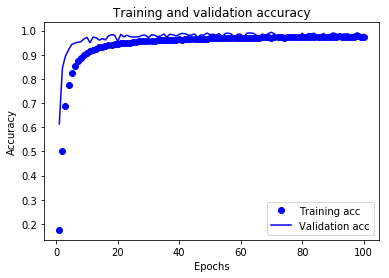

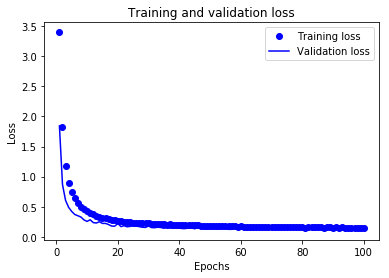

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Displaying the validation accuracy of the best model

In [9]:
from tensorflow.python.keras.models import load_model

best_model = load_model('FruitNet_fruit_image_classification_best_model_101_classes.h5')
steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(validation_generator, steps=steps_test)
print("Best validation accuracy: {0:.2%}".format(result[1]))

Best validation accuracy: 98.86%


## Predicting labels for Fruit Images

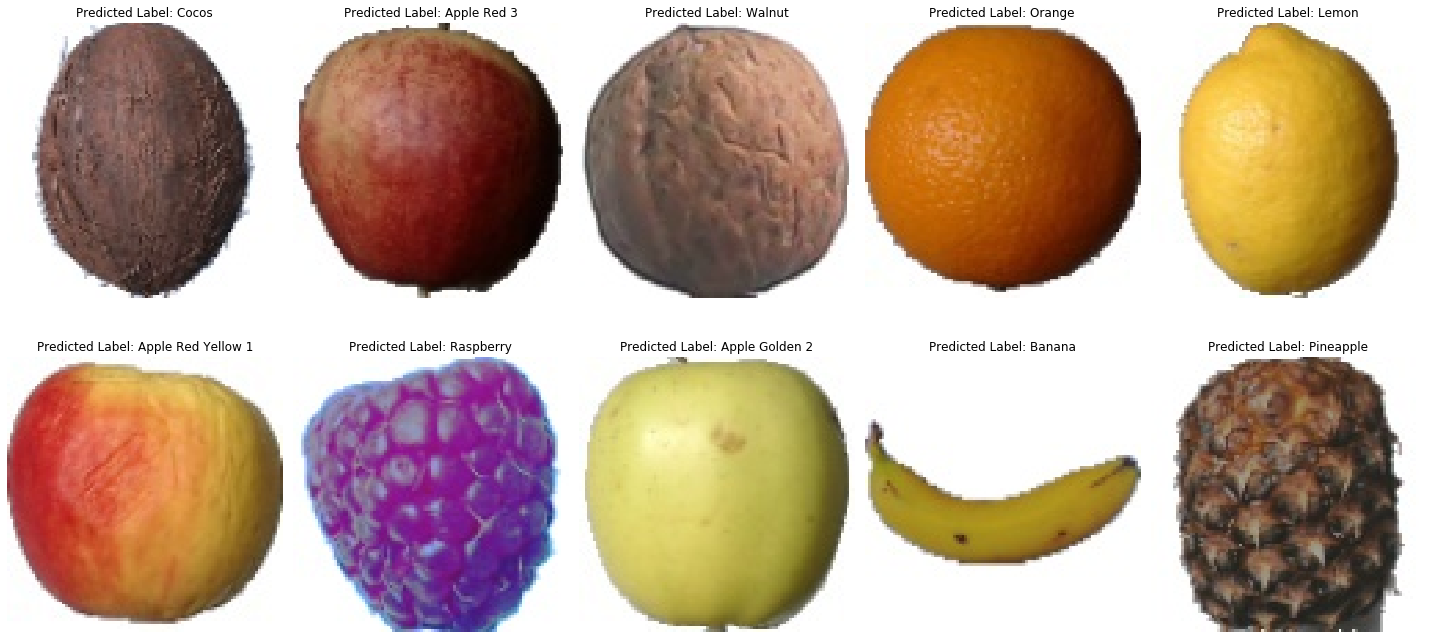

In [10]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
%matplotlib inline

TEST_DIR='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'
CATEGORIES=[]
for category in os.listdir(TEST_DIR):
    CATEGORIES.append(category)

fig = plt.figure(figsize=(20, 10))
columns = 5
rows = 2
ax=[]
filenames=['0_100.jpg','4_100.jpg','12_100.jpg','60_100.jpg','63_100.jpg','64_100.jpg','77_100.jpg','99_100.jpg','110_100.jpg','214_100.jpg']
img_array=[]
for k in range(len(filenames)):
    img= cv2.imread(filenames[k])  
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=img.astype(np.float32)/255.
    img_array.append(img)

for i in range(1,columns*rows+1):
    ax.append(fig.add_subplot(rows, columns, i))
    test_data=np.array([img_array[i-1]])
    prediction = best_model.predict(test_data)
    pred_name = CATEGORIES[np.argmax(prediction)]
    ax[-1].set_title("Predicted Label: "+pred_name)  # set title
    ax[i-1].set_xticklabels([])
    ax[i-1].set_yticklabels([])
    plt.axis('off')
    plt.imshow(img_array[i-1])

plt.subplots_adjust(wspace=0, hspace=0,left=0.1,right=0.9, bottom=0.1, top=0.9)
plt.tight_layout()
plt.show()  # finally, render the plot